<a href="https://colab.research.google.com/github/papagorgio23/GamblingTwitter_Bot/blob/master/Classification_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Research Assignment 3:

<br>

**Jason Lee**

<br>

Artificial Intelligence and Deep Learning 

2019FA MSDS 458-56
Northwestern University, SPS


**Project Nature and Content:**


Assignments 1 and 2 concerned neural networks, with a focus on computer vision. This assignment concerns natural language processing. You are asked to create deep neural networks for language processing and to analyze how various factors affect the fitting and ultimate test set performance of these networks.

**Network Topologies**

 Think in terms of exploring alternative network structures/topologies, such as (1) dense versus recurrent neural networks, (2) dense versus one-dimensional convolutional neural networks, and/or (3) recurrent neural networks with and without long short-term memory. Explain your motivation for choosing each topology.

Among the network topologies (structures) you test in this assignment, there should be at least one network with the ability to take the sequence of words into consideration. A useful exercise is to compare processing requirements and predictive accuracy of dense versus recurrent neural networks with long short-term memory.

It is suggested that you work with a text classification problem using the IMDb or Reuters document collections introduced in chapter 3 of Chollet (2018) and demonstrated in the tutorial presented by Paul Huynh (under Modules / Technology Resources). Begin by fitting a fully connected (dense) network, evaluating alternative network structures in terms of their classification performance. Then pursue either a one-dimensional convolutional neural network (CNN) or a recurrent neural network (RNN or LSTM) to classify the same documents. Compare the performance of the word-sequence-enhanced model to the fully-connected model. Sequence models are discussed in chapter 6 of Chollet (2018).

Regarding data sets for natural language processing tasks (in particular, document classification), consider using the Reduced Reuters Corpus.

(Optional) Compare the test set performance and training time for models that begin with one-hot encoding versus models that begin with word embeddings from a public-domain source (pre-trained word embeddings). Methods for obtaining and working with word embeddings are provided under Modules / Technology Resources and in Chollet (2018) chapter 6.

**Hyperparameter Settings** 

Within each network topology, evaluate alternative settings for hyperparameters. Understand that the tuning of hyperparameter settings may be best accomplished by dividing the available data into training, validation, and test sets.

For each network under study, report on its structure and hyperparameter settings. Report on the time it takes to train each network and the performance of that network in the test set.

**Visualizations**

Employ visualizations to examine the performance of each network under study. Show training and validation set results (loss/cost and performance/accuracy) across epochs.

**Management Problem**

Suppose you are asked by your current employer to develop a conversational agent or chatbot to assist customer support representatives. What advice would you give management about such development? What kinds of methods and models would be needed?  Would this be a substantial development project? Do you have any ideas about the information infrastructure needed to support conversational agents in a production environment? 

(Optional) Think about the possibilities for a generative language model using these same data. That is, drawing on methods described in chapter 8 of the Chollet (2018, pages 271-279), consider how you might develop a software robot to write movie reviews or news articles. Describe what you would do to build such a model.  If time permits, start with a few words and use a language model to generate subsequent words. Try various degrees of randomness (temperature, as described by Chollet) for the generated text sequences.




<br>

**Report Components:**


Organize the paper as a research report with each section answering basic questions as identified in bold type below:

**Abstract:** An executive summary of the research.

**Introduction:** Why are you conducting this research?  

**Literature review:** Who else has conducted research like this? 

**Methods:** How are you conducting the research? 

**Results:** What did you learn from the research?

**Conclusions:** So, what does it all mean?  

<br>

**Grading Guidelines:**

*  Data preparation, exploration, visualization (20 points)

*  Review research design and modeling methods (20 points)

*  Review results, evaluate models (20 points)

*  Implementation and programming (20 points)

*  Exposition, problem description and management recommendations (20 points)


<br>

## Load Packages

In [0]:
!pip install --upgrade gensim

     |████████████████████████████████| 24.2MB 1.2MB/s 
  Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [0]:
!pip install nlpia

     |████████████████████████████████| 32.0MB 144kB/s 
     |████████████████████████████████| 716kB 60.9MB/s 
     |████████████████████████████████| 51kB 7.8MB/s 
  Created wheel for pypandoc: filename=pypandoc-1.4-cp36-none-any.whl size=16718 sha256=b32b6233244817155c838e304f6e607c0129f58df4b01d8ded6bbba32a4795c5
  Stored in directory: /root/.cache/pip/wheels/3e/55/4f/59e0fa0914f3db52e87c0642c5fb986871dfbbf253026e639f
  Created wheel for python-Levenshtein: filename=python_Levenshtein-0.12.0-cp36-cp36m-linux_x86_64.whl size=144676 sha256=7c05758ac2c49bbd499123cf2f21aaeaa39616280db10d540986989dd0cc9fda
  Stored in directory: /root/.cache/pip/wheels/de/c2/93/660fd5f7559049268ad2dc6d81c4e39e9e36518766eaf7e342
Successfully built pypandoc python-Levenshtein


In [0]:
## data wrangling
import pandas as pd
import numpy as np

## plotting
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
import altair as alt
from keras.utils import plot_model

## misc
import json
import datetime
import warnings
warnings.filterwarnings("ignore")
import pickle
from collections import Counter


## Deep Learning
import keras

## pre-processing
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder
from keras.utils.np_utils import to_categorical 
from keras.preprocessing import sequence
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer


## models
from keras import models
from keras.models import Sequential

## layers
from keras import layers
from keras.layers import Embedding, Dense, Dropout, Flatten, Conv1D, MaxPool1D, LSTM, Bidirectional, GlobalMaxPooling1D

## word embedding
import gensim.downloader as api

## optimizer
from keras.optimizers import Adam

## evaluating model
from keras.callbacks import ReduceLROnPlateau
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import plot_model
from sklearn.metrics import confusion_matrix

# Exploratory Data Analysis

### Load Data

In [0]:
## twitter data
data  = pd.read_csv("https://raw.githubusercontent.com/papagorgio23/GamblingTwitter_Bot/master/Data/RNN_Full.csv")
train = pd.read_csv("https://raw.githubusercontent.com/papagorgio23/GamblingTwitter_Bot/master/Data/RNN_train.csv")
val = pd.read_csv("https://raw.githubusercontent.com/papagorgio23/GamblingTwitter_Bot/master/Data/RNN_val.csv")
test = pd.read_csv("https://raw.githubusercontent.com/papagorgio23/GamblingTwitter_Bot/master/Data/RNN_test.csv")

In [0]:
data.head()

screen_name                                               text
0         ClevTA  looking at last 10  years of data. home teams ...
1   adamchernoff  heads: 50 percent  / ev\ntails: 50 percent  / ...
2   RufusPeabody  (2) osu/clem/georgia win. osu/clem 100 percent...
3    ToddFuhrman  complete list of nfl week 1 lines\n\nchi -3.5 ...
4  SportsCheetah  clippers 47 blazers 40 at the half:\n\npor x2p...

## Plot Data

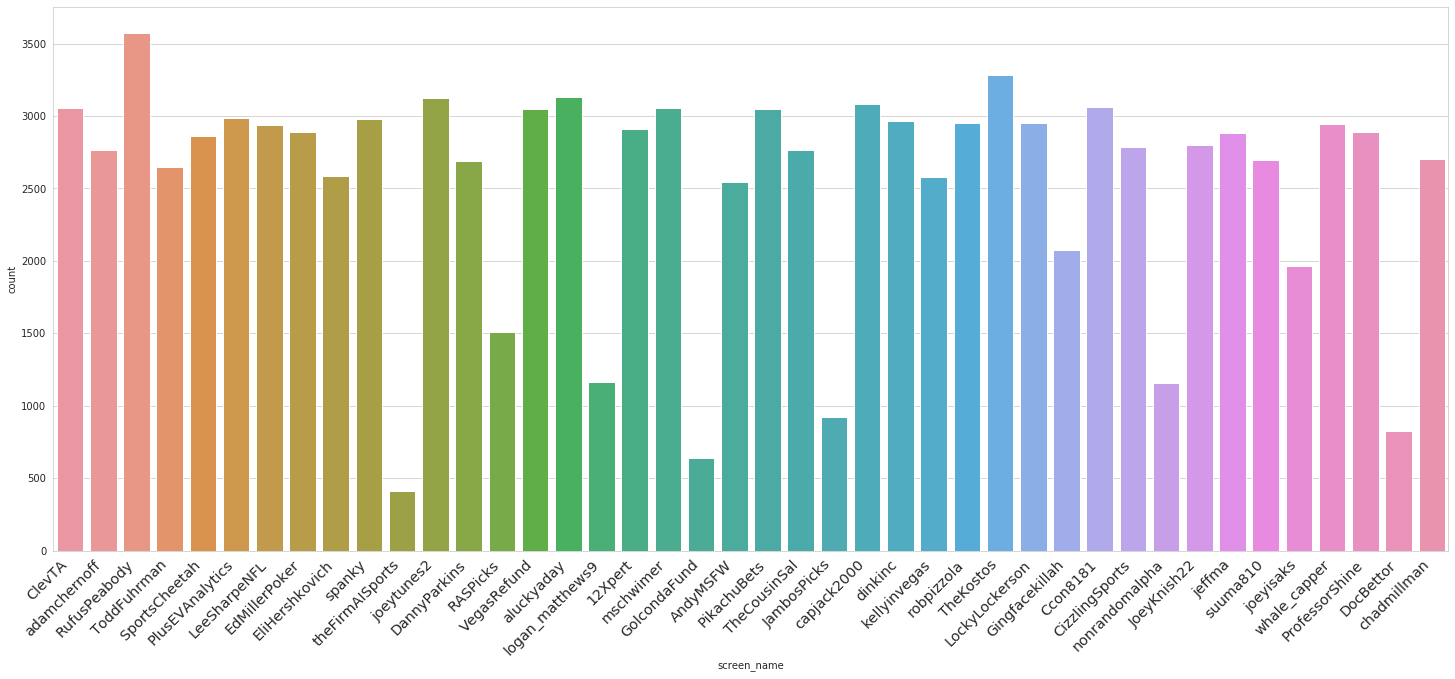

In [0]:
plt.figure(figsize = (25, 10))
ax = sns.countplot(x="screen_name", data=data)

plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
);

In [0]:
# Length of tweets
data['Tweet_length'] = data['text'].str.len()

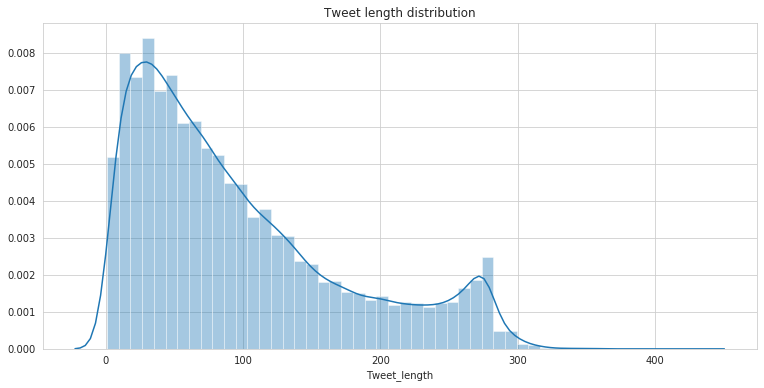

In [0]:
plt.figure(figsize=(12.8,6))
sns.distplot(data['Tweet_length']).set_title('Tweet length distribution');

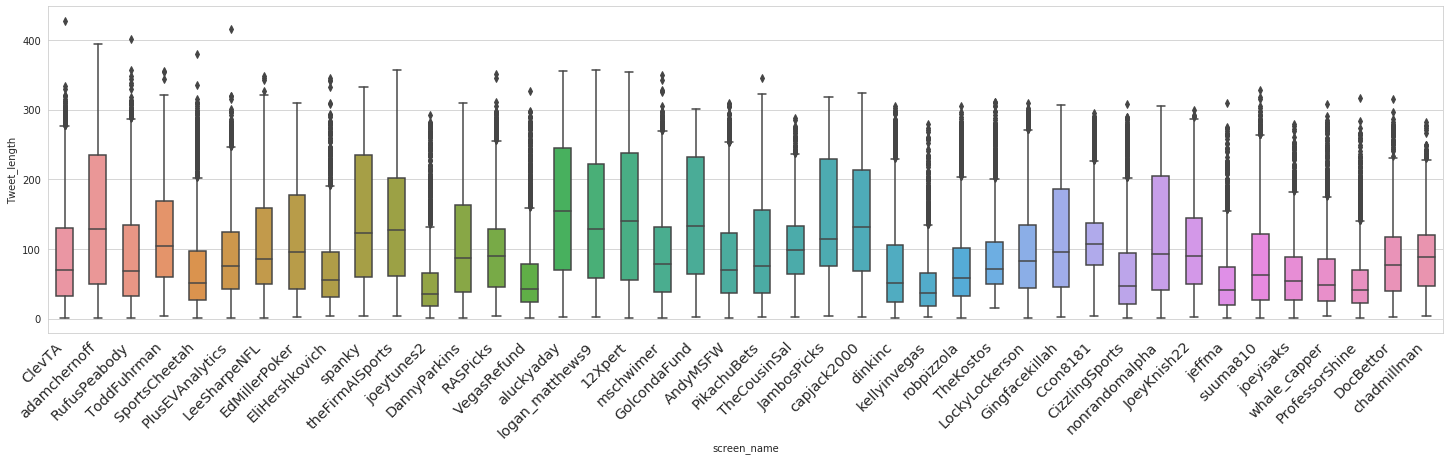

In [0]:
plt.figure(figsize=(25,6))
sns.boxplot(data=data, x='screen_name', y='Tweet_length', width=.5)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
);

## Clean Data

In [0]:
# @username, links, \r and \n 
# Lowercasing the text
data['Text_Parsed_1'] = data['text'].str.lower()
data['Text_Parsed_1'] = data['Text_Parsed_1'].str.replace('@[^\s]+', " ")
data['Text_Parsed_1'] = data['Text_Parsed_1'].str.replace("http\S+", " ")
data['Text_Parsed_1'] = data['Text_Parsed_1'].str.replace("#", " hashtag ")
data['Text_Parsed_1'] = data['Text_Parsed_1'].str.replace("%", " percent ")
data['Text_Parsed_1'] = data['Text_Parsed_1'].str.replace(" - ", " ")
data['Text_Parsed_1'] = data['Text_Parsed_1'].str.replace("\n", " ")
data['Text_Parsed_1'] = data['Text_Parsed_1'].str.replace("    ", " ")

In [0]:
# remove punctuations
punctuation_signs = list("?:!.,;/")
data['Text_Parsed_2'] = data['Text_Parsed_1']

for punct_sign in punctuation_signs:
    data['Text_Parsed_2'] = data['Text_Parsed_2'].str.replace(punct_sign, ' ')

# remove possessive pronouns
data['Text_Parsed_3'] = data['Text_Parsed_2'].str.replace("'s", "")
data['Text_Parsed_3'] = data['Text_Parsed_3'].str.replace(" ou ", " over under ")
data['Clean_Text'] = data['Text_Parsed_3'].str.strip()

In [0]:
data.head()

screen_name  ...                                         Clean_Text
0         ClevTA  ...  looking at last 10  years of data  home teams ...
1   adamchernoff  ...  heads  50 percent    ev tails  50 percent    e...
2   RufusPeabody  ...  (2) osu clem georgia win  osu clem 100 percent...
3    ToddFuhrman  ...  complete list of nfl week 1 lines  chi -3 5 vs...
4  SportsCheetah  ...  clippers 47 blazers 40 at the half   por x2pt ...

[5 rows x 7 columns]

In [0]:
print("Raw:      ", data.loc[2]['text'])
print()
print()
print("Cleaned:  ", data.loc[2]['Clean_Text'])


Raw:       (2) osu/clem/georgia win. osu/clem 100 percent 
a) ou/utah win (12 percent ):
lsu 95 percent 
uga 94 percent 
ou 7 percent 
utah 4 percent 

b) baylor/utah win (3.2 percent ):
lsu 98 percent 
uga 97 percent 
utah 4 percent 
baylor 1 percent 

c) baylor/oreg win (1.3 percent )
lsu 99 percent 
uga 98 percent 
baylor 3 percent 

d) ou/oreg win (5.4 percent )
lsu 97 percent 
uga 95 percent 
ou 8 percent


Cleaned:   (2) osu clem georgia win  osu clem 100 percent  a) over under utah win (12 percent )  lsu 95 percent  uga 94 percent  over under 7 percent  utah 4 percent   b) baylor utah win (3 2 percent )  lsu 98 percent  uga 97 percent  utah 4 percent  baylor 1 percent   c) baylor oreg win (1 3 percent ) lsu 99 percent  uga 98 percent  baylor 3 percent   d) over under oreg win (5 4 percent ) lsu 97 percent  uga 95 percent  over under 8 percent


### Clean Train/Val/Test Data

In [0]:
# @username, links, \r and \n 
# Lowercasing the text
train['Text_Parsed_1'] = train['text'].str.lower()
train['Text_Parsed_1'] = train['Text_Parsed_1'].str.replace('@[^\s]+', " ")
train['Text_Parsed_1'] = train['Text_Parsed_1'].str.replace("http\S+", " ")
train['Text_Parsed_1'] = train['Text_Parsed_1'].str.replace("#", " hashtag ")
train['Text_Parsed_1'] = train['Text_Parsed_1'].str.replace("%", " percent ")
train['Text_Parsed_1'] = train['Text_Parsed_1'].str.replace(" - ", " ")
train['Text_Parsed_1'] = train['Text_Parsed_1'].str.replace("\n", " ")
train['Text_Parsed_1'] = train['Text_Parsed_1'].str.replace("    ", " ")

# remove punctuations
punctuation_signs = list("?:!.,;/")
train['Text_Parsed_2'] = train['Text_Parsed_1']

for punct_sign in punctuation_signs:
    train['Text_Parsed_2'] = train['Text_Parsed_2'].str.replace(punct_sign, ' ')

# remove possessive pronouns
train['Text_Parsed_3'] = train['Text_Parsed_2'].str.replace("'s", "")
train['Text_Parsed_3'] = train['Text_Parsed_3'].str.replace(" ou ", " over under ")
train['Clean_Text'] = train['Text_Parsed_3'].str.strip()


# @username, links, \r and \n 
# Lowercasing the text
val['Text_Parsed_1'] = val['text'].str.lower()
val['Text_Parsed_1'] = val['Text_Parsed_1'].str.replace('@[^\s]+', " ")
val['Text_Parsed_1'] = val['Text_Parsed_1'].str.replace("http\S+", " ")
val['Text_Parsed_1'] = val['Text_Parsed_1'].str.replace("#", " hashtag ")
val['Text_Parsed_1'] = val['Text_Parsed_1'].str.replace("%", " percent ")
val['Text_Parsed_1'] = val['Text_Parsed_1'].str.replace(" - ", " ")
val['Text_Parsed_1'] = val['Text_Parsed_1'].str.replace("\n", " ")
val['Text_Parsed_1'] = val['Text_Parsed_1'].str.replace("    ", " ")

# remove punctuations
punctuation_signs = list("?:!.,;/")
val['Text_Parsed_2'] = val['Text_Parsed_1']

for punct_sign in punctuation_signs:
    val['Text_Parsed_2'] = val['Text_Parsed_2'].str.replace(punct_sign, ' ')

# remove possessive pronouns
val['Text_Parsed_3'] = val['Text_Parsed_2'].str.replace("'s", "")
val['Text_Parsed_3'] = val['Text_Parsed_3'].str.replace(" ou ", " over under ")
val['Clean_Text'] = val['Text_Parsed_3'].str.strip()



# @username, links, \r and \n 
# Lowercasing the text
test['Text_Parsed_1'] = test['text'].str.lower()
test['Text_Parsed_1'] = test['Text_Parsed_1'].str.replace('@[^\s]+', " ")
test['Text_Parsed_1'] = test['Text_Parsed_1'].str.replace("http\S+", " ")
test['Text_Parsed_1'] = test['Text_Parsed_1'].str.replace("#", " hashtag ")
test['Text_Parsed_1'] = test['Text_Parsed_1'].str.replace("%", " percent ")
test['Text_Parsed_1'] = test['Text_Parsed_1'].str.replace(" - ", " ")
test['Text_Parsed_1'] = test['Text_Parsed_1'].str.replace("\n", " ")
test['Text_Parsed_1'] = test['Text_Parsed_1'].str.replace("    ", " ")

# remove punctuations
punctuation_signs = list("?:!.,;/")
test['Text_Parsed_2'] = test['Text_Parsed_1']

for punct_sign in punctuation_signs:
    test['Text_Parsed_2'] = test['Text_Parsed_2'].str.replace(punct_sign, ' ')

# remove possessive pronouns
test['Text_Parsed_3'] = test['Text_Parsed_2'].str.replace("'s", "")
test['Text_Parsed_3'] = test['Text_Parsed_3'].str.replace(" ou ", " over under ")
test['Clean_Text'] = test['Text_Parsed_3'].str.strip()

# Load Pre-Trained Word Embeddings

In [0]:
# list of files and models available through the api
info = api.info()
print(json.dumps(info, indent=4))

{
    "corpora": {
        "semeval-2016-2017-task3-subtaskBC": {
            "num_records": -1,
            "record_format": "dict",
            "file_size": 6344358,
            "reader_code": "https://github.com/RaRe-Technologies/gensim-data/releases/download/semeval-2016-2017-task3-subtaskB-eng/__init__.py",
            "license": "All files released for the task are free for general research use",
            "fields": {
                "2016-train": [
                    "..."
                ],
                "2016-dev": [
                    "..."
                ],
                "2017-test": [
                    "..."
                ],
                "2016-test": [
                    "..."
                ]
            },
            "description": "SemEval 2016 / 2017 Task 3 Subtask B and C datasets contain train+development (317 original questions, 3,169 related questions, and 31,690 comments), and test datasets in English. The description of the tasks and the collect

## List of Models

In [0]:
for model_name, model_data in sorted(info['models'].items()):
    print(
        '%s (%d records): %s' % (
            model_name,
            model_data.get('num_records', -1),
            model_data['description'][:40] + '...',
        )
    )

__testing_word2vec-matrix-synopsis (-1 records): [THIS IS ONLY FOR TESTING] Word vecrors ...
conceptnet-numberbatch-17-06-300 (1917247 records): ConceptNet Numberbatch consists of state...
fasttext-wiki-news-subwords-300 (999999 records): 1 million word vectors trained on Wikipe...
glove-twitter-100 (1193514 records): Pre-trained vectors based on  2B tweets,...
glove-twitter-200 (1193514 records): Pre-trained vectors based on 2B tweets, ...
glove-twitter-25 (1193514 records): Pre-trained vectors based on 2B tweets, ...
glove-twitter-50 (1193514 records): Pre-trained vectors based on 2B tweets, ...
glove-wiki-gigaword-100 (400000 records): Pre-trained vectors based on Wikipedia 2...
glove-wiki-gigaword-200 (400000 records): Pre-trained vectors based on Wikipedia 2...
glove-wiki-gigaword-300 (400000 records): Pre-trained vectors based on Wikipedia 2...
glove-wiki-gigaword-50 (400000 records): Pre-trained vectors based on Wikipedia 2...
word2vec-google-news-300 (3000000 records): Pre-trai

#### Glove Wiki

In [0]:
model_wiki = api.load("glove-wiki-gigaword-50")

[==================================================] 100.0% 66.0/66.0MB downloaded


In [0]:
## get all of our tweets together for tokenization
train_X = data['Clean_Text'].fillna("_na_").values
## Tokenize the tweets
# We will only consider the top 40,000ish words in the dataset
max_words = 30000

## Tokenize
tokenizer = Tokenizer(num_words = max_words)
tokenizer.fit_on_texts(list(train_X))
train_X = tokenizer.texts_to_sequences(train_X)

## Pad the sentences 
maxlen = 30  
train_X = pad_sequences(train_X, maxlen=maxlen)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 46868 unique tokens.


In [0]:
nb_words = min(max_words, len(word_index))
embedding_dim = 50
# randomized weights for missing words... !??
#embedding_matrix = (np.random.rand(nb_words, embedding_dim) - 0.5) / 5.0
embedding_matrix = np.zeros((max_words, embedding_dim)) ## create zeros for weights
len(embedding_matrix)
# loop through all words in our vocabulary and return their GloVe Weights
for word, i in word_index.items():
    if i >= max_words: continue
    if word in model_wiki:
        embedding_vector = model_wiki.get_vector(word)
        embedding_matrix[i] = embedding_vector

In [0]:
# how many words actually mapped to our embedding.... divide by the dimension
np.count_nonzero(embedding_matrix)

1503950

In [0]:
# how many words actually mapped to our embedding.... divide by the dimension
np.count_nonzero(embedding_matrix)/50

30079.0

### Word2Vec

In [0]:
model_w2v = api.load("word2vec-google-news-300")

[=================================================-] 98.6% 1639.3/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=================================================-] 99.5% 1653.8/1662.8MB downloaded


In [0]:
## get all of our tweets together for tokenization
data_X = data['Clean_Text'].fillna("_na_").values

In [0]:
## Tokenize the tweets
# We will only consider the top 40,000ish words in the dataset
max_words = 44000

## Tokenize
tokenizer = Tokenizer(num_words = max_words)
tokenizer.fit_on_texts(list(data_X))
data_X = tokenizer.texts_to_sequences(data_X)

In [0]:
## Pad the sentences 
maxlen = 50  
data_X = pad_sequences(data_X, maxlen=maxlen)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 44031 unique tokens.


In [0]:
nb_words = min(max_words, len(word_index))
embedding_dim = 300
# randomized weights for missing words... !??
#embedding_matrix = (np.random.rand(nb_words, embedding_dim) - 0.5) / 5.0
embedding_matrix = np.zeros((max_words, embedding_dim)) ## create zeros for weights
len(embedding_matrix)
# loop through all words in our vocabulary and return their GloVe Weights
for word, i in word_index.items():
    if i >= max_words: continue
    if word in model_w2v:
        embedding_vector = model_w2v.get_vector(word)
        embedding_matrix[i] = embedding_vector

In [0]:
# how many words actually mapped to our embedding.... divide by the dimension
np.count_nonzero(embedding_matrix)

8374200

In [0]:
(np.count_nonzero(embedding_matrix))/300

27914.0

In [0]:
((np.count_nonzero(embedding_matrix))/300) / (len(word_index))

0.6339624355567668

In [0]:
model_w2v.most_similar("pts")

[('##pts', 0.7718505859375),
 ('5pts', 0.7070859670639038),
 ('8pts', 0.6968610882759094),
 ('7pts', 0.6853930354118347),
 ('rbds', 0.6841314435005188),
 ('6pts', 0.683112382888794),
 ('9pts', 0.6691194772720337),
 ('4pts', 0.6610798835754395),
 ('Pts', 0.6566917896270752),
 ('###pts', 0.6545425653457642)]

### Glove Model

I will be using the GloVe Twitter pretrained model with 200 dimensions  
or possibly the 25 dimension model

In [0]:
model_25 = api.load("glove-twitter-25")

[==================================================] 100.0% 104.8/104.8MB downloaded


In [0]:
model_200 = api.load("glove-twitter-200")
model.most_similar("glass")

[==================================================] 100.0% 104.8/104.8MB downloaded


[('lamp', 0.9047179222106934),
 ('wood', 0.9034247398376465),
 ('oz', 0.8972457051277161),
 ('sand', 0.8971636891365051),
 ('paint', 0.8952186107635498),
 ('leaf', 0.8941252827644348),
 ('bottle', 0.8934361934661865),
 ('umbrella', 0.8917711973190308),
 ('steel', 0.8896211385726929),
 ('tree', 0.8895832300186157)]

In [0]:
model.most_similar("imo")

[('definately', 0.7175354957580566),
 ('IMHO', 0.7061859369277954),
 ('thats', 0.7053737044334412),
 ('tho', 0.6917688846588135),
 ('i_dont', 0.6723967790603638),
 ('tbh', 0.6701918840408325),
 ('definitly', 0.6576553583145142),
 ('definetly', 0.6545764207839966),
 ('lol', 0.6535724997520447),
 ('dos_santos', 0.6497949361801147)]

In [0]:
model_25.get_vector("football")

array([ 0.36491  ,  0.46657  , -0.64874  , -1.6317   , -0.10499  ,
        0.29539  ,  1.102    , -0.37133  , -0.37283  , -0.80927  ,
        0.18891  ,  0.31195  , -4.1618   ,  0.65512  ,  1.4357   ,
       -0.0057378, -0.3075   , -1.2917   , -0.39751  ,  0.65063  ,
       -0.83692  ,  0.68736  ,  0.19409  , -1.3879   , -0.064282 ],
      dtype=float32)

In [0]:
len(tokenizer.word_index)

46868

# Pre-Processing

## Target Variable

In [0]:
train_y = train['screen_name']
val_y = val['screen_name']
test_y = test['screen_name']

In [0]:
label_encoder.classes_

array(['12Xpert', 'AndyMSFW', 'Ccon8181', 'CizzlingSports', 'ClevTA',
       'DannyParkins', 'DocBettor', 'EdMillerPoker', 'EliHershkovich',
       'Gingfacekillah', 'GolcondaFund', 'JambosPicks', 'JoeyKnish22',
       'LeeSharpeNFL', 'LockyLockerson', 'PikachuBets', 'PlusEVAnalytics',
       'ProfessorShine', 'RASPicks', 'RufusPeabody', 'SportsCheetah',
       'TheCousinSal', 'TheKostos', 'ToddFuhrman', 'VegasRefund',
       'adamchernoff', 'aluckyaday', 'capjack2000', 'chadmillman',
       'dinkinc', 'jeffma', 'joeyisaks', 'joeytunes2', 'kellyinvegas',
       'logan_matthews9', 'mschwimer', 'nonrandomalpha', 'robpizzola',
       'spanky', 'suuma810', 'theFirmAISports', 'whale_capper'],
      dtype=object)

In [0]:
# define 
values_train = np.array(train_y)
values_val = np.array(val_y)
values_test = np.array(test_y)

# integer encode
label_encoder = LabelEncoder()
integer_encoded_train = label_encoder.fit_transform(values_train)
integer_encoded_val = label_encoder.fit_transform(values_val)
integer_encoded_test = label_encoder.fit_transform(values_test)

# categorical encode
y_train = to_categorical(integer_encoded_train)
y_val = to_categorical(integer_encoded_val)
y_test = to_categorical(integer_encoded_test)

## Tokenize Tweets to Sequences

In [0]:
## get all of our tweets together for tokenization
train_X = train['Clean_Text'].fillna("_na_").values
val_X = val['Clean_Text'].fillna("_na_").values
test_X = test['Clean_Text'].fillna("_na_").values

In [0]:
train_X = tokenizer.texts_to_sequences(train_X)
val_X = tokenizer.texts_to_sequences(val_X)
test_X = tokenizer.texts_to_sequences(test_X)

## Pad Sequences

We will cut tweets after 50 words (Median = 15)  
90% of all our tweets are less than 50 words

In [0]:
## Pad the sentences 
maxlen = 50  
train_X = pad_sequences(train_X, maxlen=maxlen)
val_X = pad_sequences(val_X, maxlen=maxlen)
test_X = pad_sequences(test_X, maxlen=maxlen)

# Neural Network 1: DNN

## Build Model

In [0]:
## Build DNN Model
model_dnn = Sequential(name = "Dense Neural Network")
model_dnn.add(Embedding(max_words, embedding_dim, input_length = maxlen, name = "Word2Vec"))
model_dnn.add(Flatten(name = "Flatten"))
model_dnn.add(Dense(64, activation='relu', name = "Dense_Layer"))
model_dnn.add(Dropout(0.3, name = "Dropout")) # dropout
model_dnn.add(Dense(42, activation='softmax', name = "Output"))

## Freeze the embedding weights equal to our pretrained model
model_dnn.layers[0].set_weights([embedding_matrix])
model_dnn.layers[0].trainable = False

model_dnn.summary()

model_dnn.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

Model: "Dense Neural Network"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Word2Vec (Embedding)         (None, 50, 300)           13200000  
_________________________________________________________________
Flatten (Flatten)            (None, 15000)             0         
_________________________________________________________________
Dense_Layer (Dense)          (None, 64)                960064    
_________________________________________________________________
Dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
Output (Dense)               (None, 42)                2730      
Total params: 14,162,794
Trainable params: 962,794
Non-trainable params: 13,200,000
_________________________________________________________________


## View Model

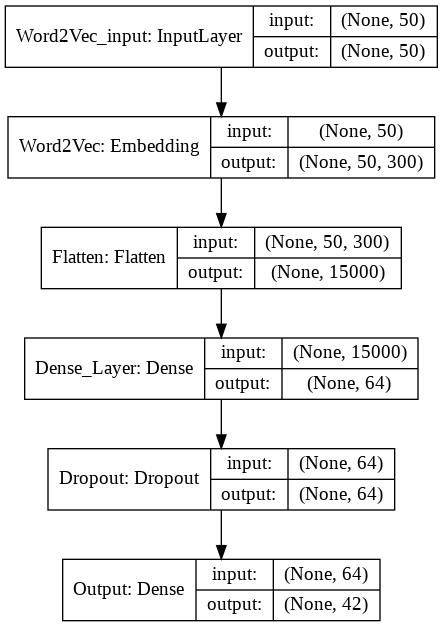

In [0]:
# plot model structure
plot_model(model_dnn, show_layer_names=True, show_shapes=True, expand_nested=True)

## Train Model

In [0]:
## Train Model
# Record the time
warnings.filterwarnings('ignore')
start = datetime.datetime.now()

history_dnn = model_dnn.fit(train_X, y_train,
                            epochs=10,
                            batch_size=32,  
                            validation_data=(val_X, y_val))

end = datetime.datetime.now()
dnn_time_diff = end-start
print()
print()
print('Time to train = {}'.format(dnn_time_diff))

## Save Model
model_dnn.save_weights('twitter_dnn_model.h5')

Train on 68401 samples, validate on 17076 samples
Epoch 1/10
68401/68401 [==============================] - 16s 241us/step - loss: 3.3444 - acc: 0.1237 - val_loss: 3.1536 - val_acc: 0.1690
Epoch 2/10
68401/68401 [==============================] - 14s 212us/step - loss: 2.9697 - acc: 0.2064 - val_loss: 3.0792 - val_acc: 0.1888
Epoch 3/10
68401/68401 [==============================] - 14s 211us/step - loss: 2.7019 - acc: 0.2687 - val_loss: 3.1007 - val_acc: 0.1859
Epoch 4/10
68401/68401 [==============================] - 14s 209us/step - loss: 2.4761 - acc: 0.3222 - val_loss: 3.1664 - val_acc: 0.1879
Epoch 5/10
68401/68401 [==============================] - 14s 210us/step - loss: 2.2955 - acc: 0.3637 - val_loss: 3.2474 - val_acc: 0.1856
Epoch 6/10
68401/68401 [==============================] - 15s 217us/step - loss: 2.1429 - acc: 0.3998 - val_loss: 3.3598 - val_acc: 0.1852
Epoch 7/10
68401/68401 [==============================] - 15s 212us/step - loss: 2.0138 - acc: 0.4315 - val_loss: 3.

## Plot Accuracy

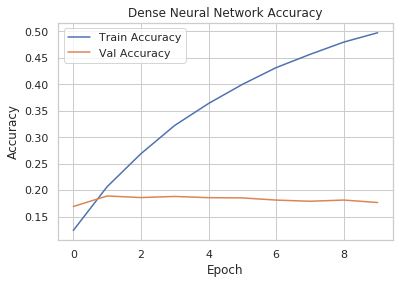

In [0]:
# Plot training & validation accuracy values
plt.plot(history_dnn.history['acc'])
plt.plot(history_dnn.history['val_acc'])
plt.title('Dense Neural Network Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train Accuracy', 'Val Accuracy'], loc='upper left')
plt.show()

# Neural Network 2: 1D CNN

## Build Model

In [0]:
maxlen = 50
batch_size = 32
embedding_dim = 300
filters = 250
kernal_size = 3
hidden_dims = 250
epochs = 10

In [0]:
## Build CNN Model


# start model
model_cnn = Sequential(name="1D Convolutional Neural Network")

# embedding layer
model_cnn.add(Embedding(max_words, embedding_dim, input_length = maxlen, name = "Word2Vec"))

# convolutional layer
model_cnn.add(Conv1D(filters=filters, 
                            kernel_size=kernal_size,
                            strides = 1,
                            padding = 'valid',
                            activation='relu', 
                            name = "CNN_Layer_1"))
# dropout
model_cnn.add(Dropout(0.3, name = "Dropout_1")) 

# convolutional layer
model_cnn.add(Conv1D(filters=filters, 
                            kernel_size=kernal_size,
                            strides = 1,
                            padding = 'valid',
                            activation='relu', 
                            name = "CNN_Layer_2"))
# dropout
model_cnn.add(Dropout(0.3, name = "Dropout_2")) 
model_cnn.add(GlobalMaxPooling1D(name = "Max_Pooling"))
model_cnn.add(Dense(42, activation='softmax', name = "Output"))

## Freeze the embedding weights equal to our pretrained model
model_cnn.layers[0].set_weights([embedding_matrix])
model_cnn.layers[0].trainable = False

# print model summary
model_cnn.summary()

# compiler
model_cnn.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])



Model: "1D Convolutional Neural Network"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Word2Vec (Embedding)         (None, 50, 300)           13200000  
_________________________________________________________________
CNN_Layer_1 (Conv1D)         (None, 48, 250)           225250    
_________________________________________________________________
Dropout_1 (Dropout)          (None, 48, 250)           0         
_________________________________________________________________
CNN_Layer_2 (Conv1D)         (None, 46, 250)           187750    
_________________________________________________________________
Dropout_2 (Dropout)          (None, 46, 250)           0         
_________________________________________________________________
Max_Pooling (GlobalMaxPoolin (None, 250)               0         
_________________________________________________________________
Output (Dense)               (None,

## View Model

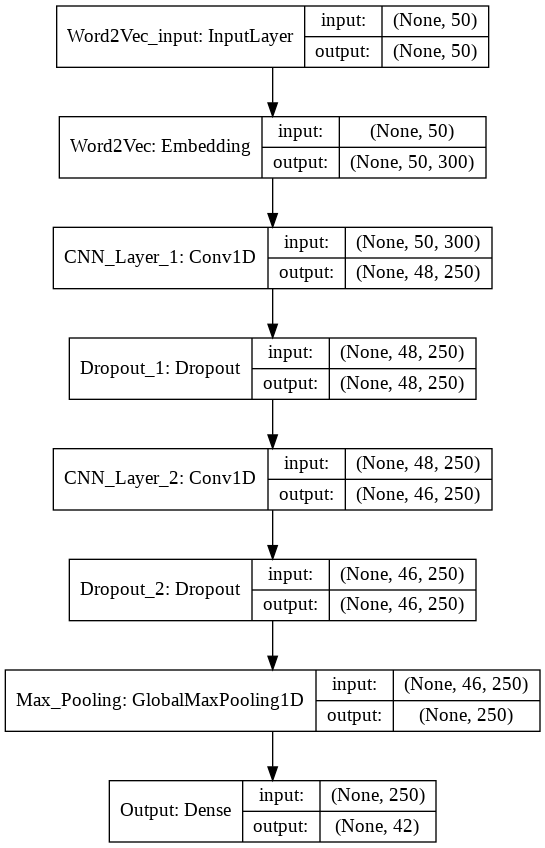

In [0]:
# plot model structure
plot_model(model_cnn, show_layer_names=True, show_shapes=True, expand_nested=True)

## Train Model

In [0]:
## Train Model

# Record the time
warnings.filterwarnings('ignore')
start = datetime.datetime.now()

history_cnn = model_cnn.fit(train_X, y_train,
                            epochs=epochs,
                            batch_size=batch_size,
                            validation_data=(val_X, y_val))

end = datetime.datetime.now()
cnn_time_diff = end-start
print()
print()
print('Time to train = {}'.format(cnn_time_diff))
print()
## Save Model
model_cnn.save_weights('twitter_cnn_model.h5')

Train on 68401 samples, validate on 17076 samples
Epoch 1/10
68401/68401 [==============================] - 42s 620us/step - loss: 3.1454 - acc: 0.1706 - val_loss: 2.9072 - val_acc: 0.2320
Epoch 2/10
68401/68401 [==============================] - 41s 601us/step - loss: 2.8004 - acc: 0.2513 - val_loss: 2.7615 - val_acc: 0.2779
Epoch 3/10
68401/68401 [==============================] - 41s 602us/step - loss: 2.6487 - acc: 0.2865 - val_loss: 2.6849 - val_acc: 0.2879
Epoch 4/10
68401/68401 [==============================] - 41s 603us/step - loss: 2.5372 - acc: 0.3138 - val_loss: 2.6449 - val_acc: 0.2990
Epoch 5/10
68401/68401 [==============================] - 41s 606us/step - loss: 2.4589 - acc: 0.3316 - val_loss: 2.6198 - val_acc: 0.3029
Epoch 6/10
68401/68401 [==============================] - 42s 619us/step - loss: 2.3798 - acc: 0.3524 - val_loss: 2.5979 - val_acc: 0.3097
Epoch 7/10
68401/68401 [==============================] - 41s 601us/step - loss: 2.3161 - acc: 0.3656 - val_loss: 2.

## Plot Accuracy

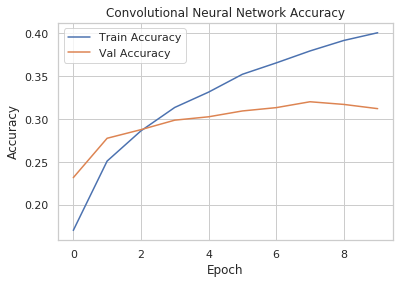

In [0]:
# Plot training & validation accuracy values
plt.plot(history_cnn.history['acc'])
plt.plot(history_cnn.history['val_acc'])
plt.title('Convolutional Neural Network Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train Accuracy', 'Val Accuracy'], loc='upper left')
plt.show()

# Neural Network 3: RNN

## Build Model

In [0]:
## Build RNN Model
model_rnn = Sequential(name="Recurrnet Neural Network")
model_rnn.add(Embedding(max_words, embedding_dim, input_length=maxlen, name = "Word2Vec"))
model_rnn.add(LSTM(100, return_sequences=True, dropout=0.2, recurrent_dropout=0.2, name = "LSTM_Layer_1"))
model_rnn.add(LSTM(100, return_sequences=True, dropout=0.2, recurrent_dropout=0.2, name = "LSTM_Layer_2"))
model_rnn.add(Flatten())
model_rnn.add(Dense(42, activation='softmax', name = "Output"))

## Freeze the embedding weights equal to our pretrained model
model_rnn.layers[0].set_weights([embedding_matrix])
model_rnn.layers[0].trainable = False

# print model summary
model_rnn.summary()

# compiler
model_rnn.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

Model: "Recurrnet Neural Network"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Word2Vec (Embedding)         (None, 50, 300)           13200000  
_________________________________________________________________
LSTM_Layer_1 (LSTM)          (None, 50, 100)           160400    
_________________________________________________________________
LSTM_Layer_2 (LSTM)          (None, 50, 100)           80400     
_________________________________________________________________
flatten_1 (Flatten)          (None, 5000)              0         
_________________________________________________________________
Output (Dense)               (None, 42)                210042    
Total params: 13,650,842
Trainable params: 450,842
Non-trainable params: 13,200,000
_________________________________________________________________


## View Model

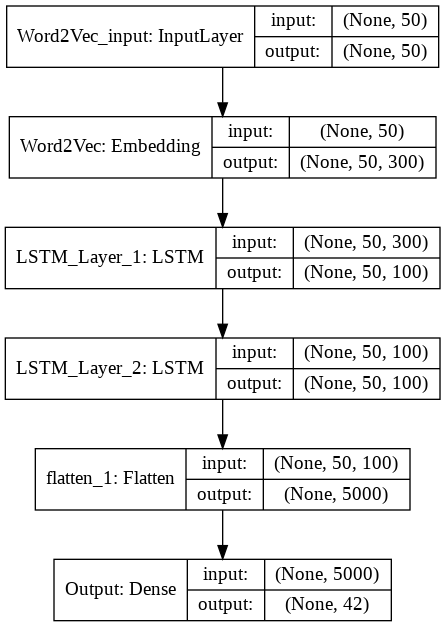

In [0]:
# plot model structure
plot_model(model_rnn, show_layer_names=True, show_shapes=True, expand_nested=True)

## Train Model

In [0]:
## Train Model

# Record the time
warnings.filterwarnings('ignore')
start = datetime.datetime.now()

history_rnn = model_rnn.fit(train_X, y_train,
                            epochs=10,
                            batch_size=32,    
                            validation_data=(val_X, y_val))


end = datetime.datetime.now()
rnn_time_diff = end-start
print()
print()
print('Time to train = {}'.format(rnn_time_diff))
print()

## Save Model
model_rnn.save_weights('twitter_rnn_model.h5')

Train on 68401 samples, validate on 17076 samples
Epoch 1/10
68401/68401 [==============================] - 319s 5ms/step - loss: 3.2413 - acc: 0.1434 - val_loss: 2.9994 - val_acc: 0.1981
Epoch 2/10
68401/68401 [==============================] - 314s 5ms/step - loss: 2.9504 - acc: 0.2135 - val_loss: 2.8273 - val_acc: 0.2432
Epoch 3/10
68401/68401 [==============================] - 314s 5ms/step - loss: 2.7909 - acc: 0.2480 - val_loss: 2.7547 - val_acc: 0.2586
Epoch 4/10
68401/68401 [==============================] - 316s 5ms/step - loss: 2.6579 - acc: 0.2811 - val_loss: 2.6997 - val_acc: 0.2754
Epoch 5/10
68401/68401 [==============================] - 316s 5ms/step - loss: 2.5389 - acc: 0.3094 - val_loss: 2.6569 - val_acc: 0.2868
Epoch 6/10
68401/68401 [==============================] - 319s 5ms/step - loss: 2.4436 - acc: 0.3323 - val_loss: 2.6502 - val_acc: 0.2924
Epoch 7/10
68401/68401 [==============================] - 319s 5ms/step - loss: 2.3579 - acc: 0.3528 - val_loss: 2.6543 - 

## Plot Accuracy

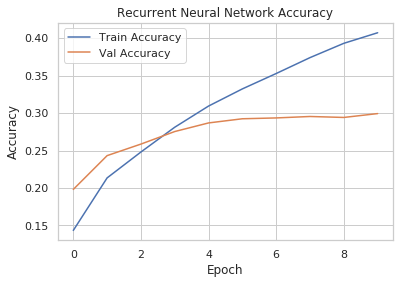

In [0]:
# Plot training & validation accuracy values
plt.plot(history_rnn.history['acc'])
plt.plot(history_rnn.history['val_acc'])
plt.title('Recurrent Neural Network Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train Accuracy', 'Val Accuracy'], loc='upper left')
plt.show()

# Neural Network 4: Bidirectional RNN

## Build Model

In [0]:
## Build RNN Model
model_brnn = Sequential(name="Bidirectional Recurrnet Neural Network")
model_brnn.add(Embedding(max_words, embedding_dim, input_length=maxlen, name = "Word2Vec"))
model_brnn.add(Bidirectional(LSTM(100, dropout=0.2, recurrent_dropout=0.2, return_sequences=True), name = "Bi-LSTM_1"))
model_brnn.add(Bidirectional(LSTM(100, dropout=0.2, recurrent_dropout=0.2, return_sequences=True), name = "Bi-LSTM_2"))
model_brnn.add(Flatten())
model_brnn.add(Dense(42, activation='softmax', name = "Output"))

## Freeze the embedding weights equal to our pretrained model
model_brnn.layers[0].set_weights([embedding_matrix])
model_brnn.layers[0].trainable = False

# print model summary
model_brnn.summary()

# compiler
model_brnn.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

Model: "Bidirectional Recurrnet Neural Network"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Word2Vec (Embedding)         (None, 50, 300)           13200000  
_________________________________________________________________
Bi-LSTM_1 (Bidirectional)    (None, 50, 200)           320800    
_________________________________________________________________
Bi-LSTM_2 (Bidirectional)    (None, 50, 200)           240800    
_________________________________________________________________
flatten_4 (Flatten)          (None, 10000)             0         
_________________________________________________________________
Output (Dense)               (None, 42)                420042    
Total params: 14,181,642
Trainable params: 981,642
Non-trainable params: 13,200,000
_________________________________________________________________


## View Model

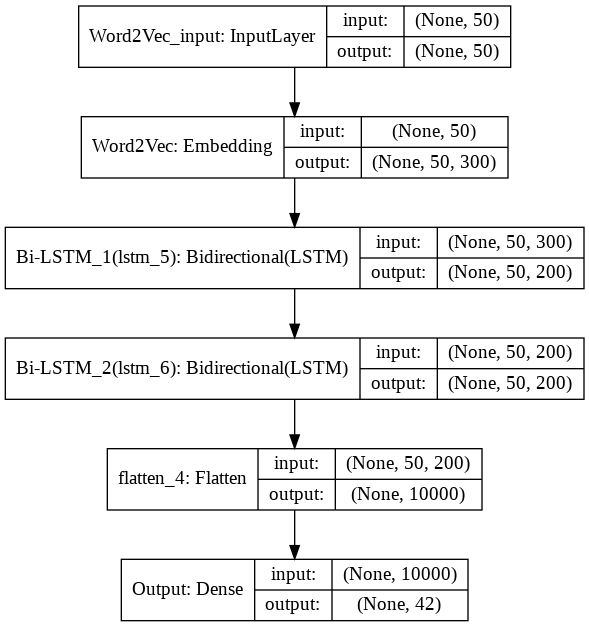

In [0]:
# plot model structure
plot_model(model_brnn, show_layer_names=True, show_shapes=True, expand_nested=True)

## Train Model

In [0]:
# Train Model

# Record the time
warnings.filterwarnings('ignore')
start = datetime.datetime.now()

history_brnn = model_brnn.fit(train_X, y_train,
                              epochs=10,
                              batch_size=32,
                              validation_data=(val_X, y_val))


end = datetime.datetime.now()
brnn_time_diff = end-start
print()
print()
print('Time to train = {}'.format(brnn_time_diff))
print()

## Save Model
model_brnn.save_weights('twitter_brnn_model.h5')

Train on 68401 samples, validate on 17076 samples
Epoch 1/10
68401/68401 [==============================] - 512s 7ms/step - loss: 3.1547 - acc: 0.1658 - val_loss: 2.9405 - val_acc: 0.2184
Epoch 2/10
68401/68401 [==============================] - 500s 7ms/step - loss: 2.8454 - acc: 0.2382 - val_loss: 2.7511 - val_acc: 0.2641
Epoch 3/10
68401/68401 [==============================] - 499s 7ms/step - loss: 2.6523 - acc: 0.2840 - val_loss: 2.6622 - val_acc: 0.2892
Epoch 4/10
68401/68401 [==============================] - 502s 7ms/step - loss: 2.4822 - acc: 0.3249 - val_loss: 2.6076 - val_acc: 0.3032
Epoch 5/10
68401/68401 [==============================] - 513s 7ms/step - loss: 2.3260 - acc: 0.3616 - val_loss: 2.6142 - val_acc: 0.3066
Epoch 6/10
68401/68401 [==============================] - 502s 7ms/step - loss: 2.1774 - acc: 0.4006 - val_loss: 2.6246 - val_acc: 0.3110
Epoch 7/10
68401/68401 [==============================] - 505s 7ms/step - loss: 2.0348 - acc: 0.4351 - val_loss: 2.6665 - 

## Plot Accuracy

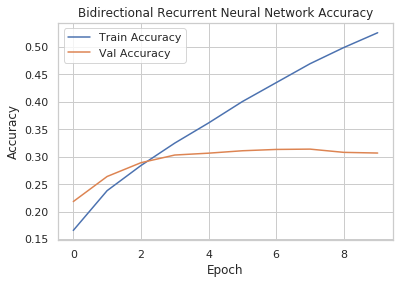

In [0]:
# Plot training & validation accuracy values
plt.plot(history_brnn.history['acc'])
plt.plot(history_brnn.history['val_acc'])
plt.title('Bidirectional Recurrent Neural Network Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train Accuracy', 'Val Accuracy'], loc='upper left')
plt.show()

# Evaluate Models

## Predict

In [0]:
pred_1 = model_dnn.predict_classes(test_X)
pred_2 = model_cnn.predict_classes(test_X)
pred_3 = model_rnn.predict_classes(test_X)
pred_4 = model_brnn.predict_classes(test_X)

In [0]:
score_1 = model_dnn.evaluate(test_X, y_test, verbose=1)
score_2 = model_cnn.evaluate(test_X, y_test, verbose=1)
score_3 = model_rnn.evaluate(test_X, y_test, verbose=1)
score_4 = model_brnn.evaluate(test_X, y_test, verbose=1)

print("DNN => %s: %.2f%%" % (model_dnn.metrics_names[1], score_1[1]*100))
print("CNN => %s: %.2f%%" % (model_cnn.metrics_names[1], score_2[1]*100))
print("RNN => %s: %.2f%%" % (model_rnn.metrics_names[1], score_3[1]*100))
print("BiRNN => %s: %.2f%%" % (model_brnn.metrics_names[1], score_4[1]*100))

21348/21348 [==============================] - 28s 1ms/step
DNN => acc: 17.38%
CNN => acc: 31.50%
RNN => acc: 29.43%
BiRNN => acc: 30.35%


## Plot Results

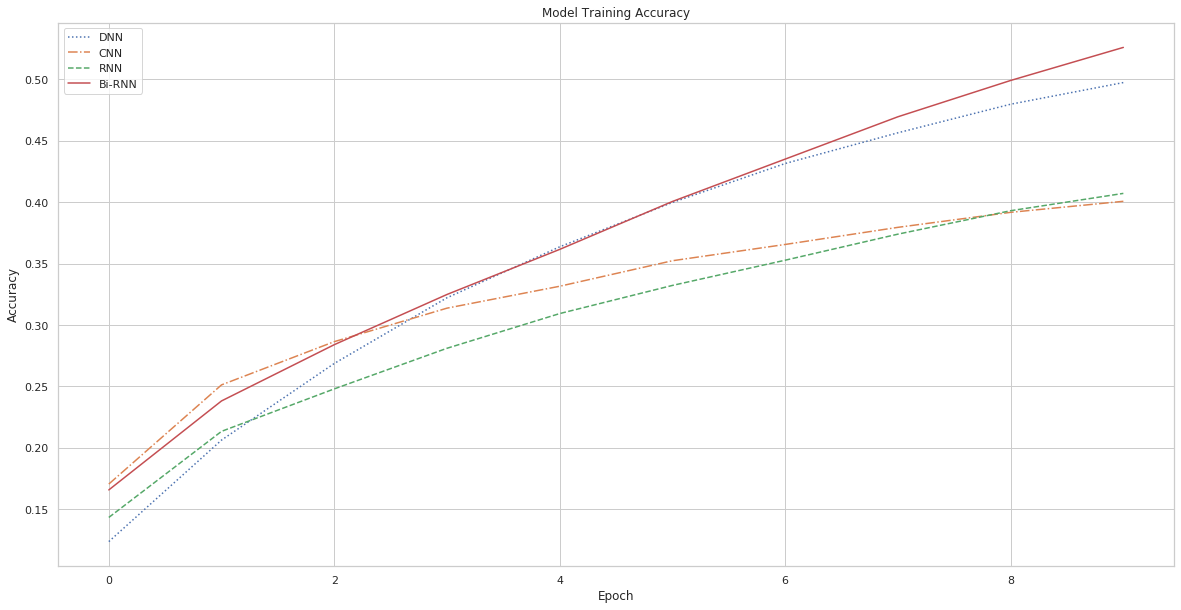

In [0]:
# Plot Accuracy
plt.figure(figsize=(20,10))

styles = [':','-.','--','-']
names = ["DNN","CNN","RNN", "Bi-RNN"]


plt.plot(history_dnn.history['acc'], linestyle=styles[0])
plt.plot(history_cnn.history['acc'], linestyle=styles[1])
plt.plot(history_rnn.history['acc'], linestyle=styles[2])
plt.plot(history_brnn.history['acc'], linestyle=styles[3])

plt.title('Model Training Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(names, loc='upper left')
plt.show()

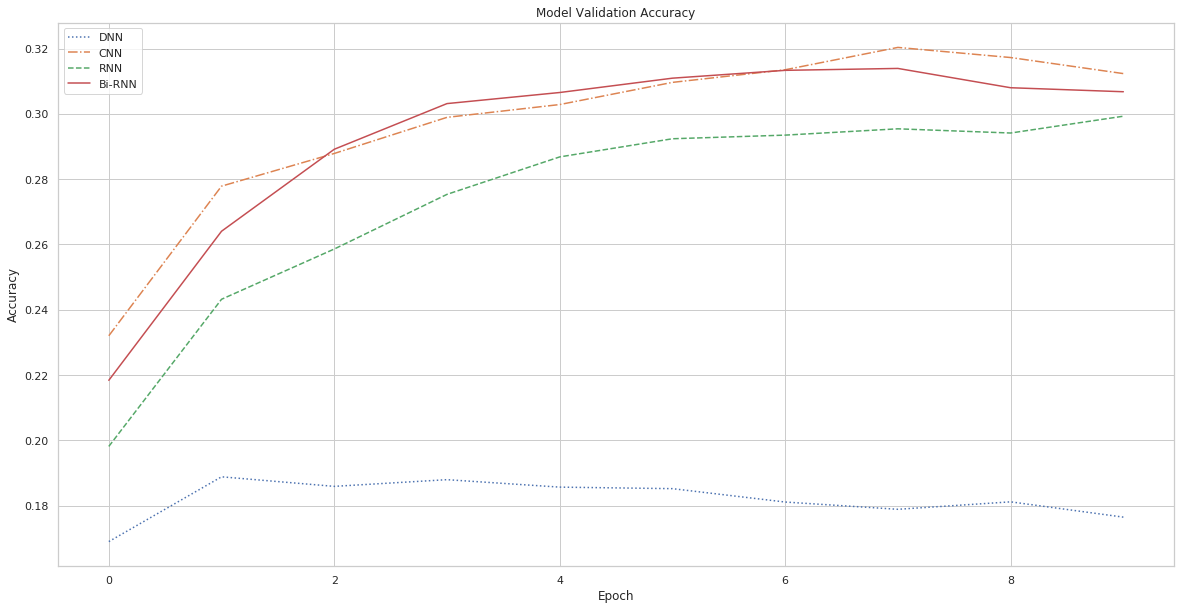

In [0]:
# Plot Accuracy
plt.figure(figsize=(20,10))

styles = [':','-.','--','-']
names = ["DNN","CNN","RNN", "Bi-RNN"]


plt.plot(history_dnn.history['val_acc'], linestyle=styles[0])
plt.plot(history_cnn.history['val_acc'], linestyle=styles[1])
plt.plot(history_rnn.history['val_acc'], linestyle=styles[2])
plt.plot(history_brnn.history['val_acc'], linestyle=styles[3])

plt.title('Model Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(names, loc='upper left')
plt.show()

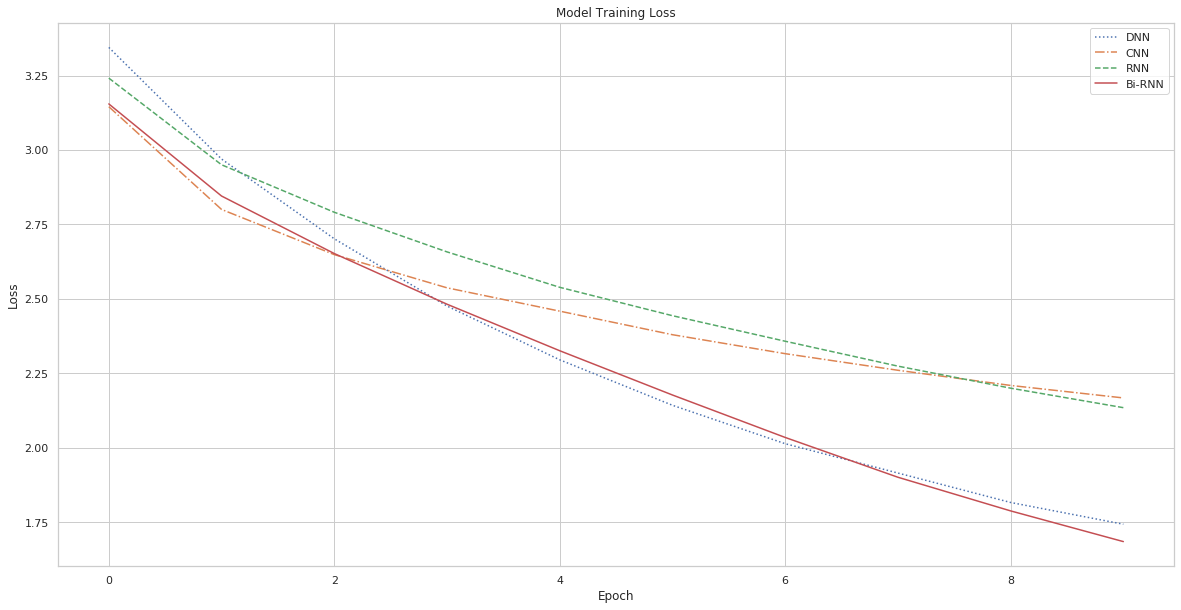

In [0]:
# Plot Loss
plt.figure(figsize=(20,10))

styles = [':','-.','--','-']
names = ["DNN","CNN","RNN", "Bi-RNN"]


plt.plot(history_dnn.history['loss'], linestyle=styles[0])
plt.plot(history_cnn.history['loss'], linestyle=styles[1])
plt.plot(history_rnn.history['loss'], linestyle=styles[2])
plt.plot(history_brnn.history['loss'], linestyle=styles[3])

plt.title('Model Training Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(names, loc='upper right')
plt.show()

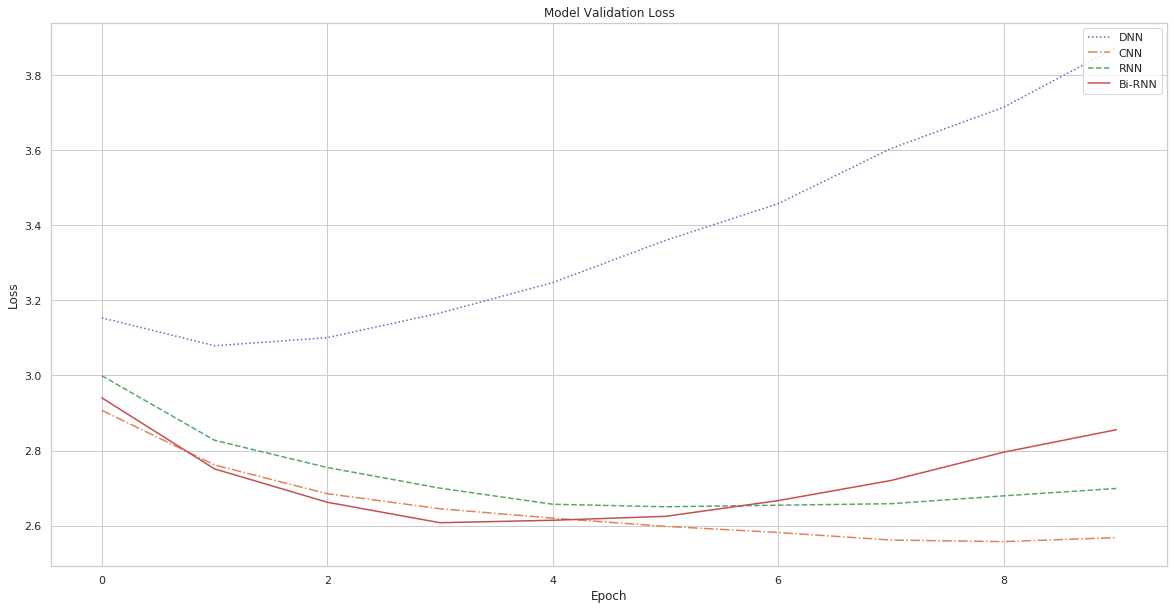

In [0]:
# Plot Loss
plt.figure(figsize=(20,10))

styles = [':','-.','--','-']
names = ["DNN","CNN","RNN", "Bi-RNN"]


plt.plot(history_dnn.history['val_loss'], linestyle=styles[0])
plt.plot(history_cnn.history['val_loss'], linestyle=styles[1])
plt.plot(history_rnn.history['val_loss'], linestyle=styles[2])
plt.plot(history_brnn.history['val_loss'], linestyle=styles[3])

plt.title('Model Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(names, loc='upper right')
plt.show()

## Confusion Matrix

In [0]:
#Confusion Matrix
matrix_dnn = pd.DataFrame(confusion_matrix(integer_encoded_test, pred_1, labels = [x for x in range(0,42)]))
matrix_cnn = pd.DataFrame(confusion_matrix(integer_encoded_test, pred_2, labels = [x for x in range(0,42)]))
matrix_rnn = pd.DataFrame(confusion_matrix(integer_encoded_test, pred_3, labels = [x for x in range(0,42)]))
matrix_brnn = pd.DataFrame(confusion_matrix(integer_encoded_test, pred_4, labels = [x for x in range(0,42)]))

## Rename columns and index to their actual names
labels = list(np.array(label_encoder.classes_))
matrix_dnn.columns=labels
matrix_dnn.index=labels

matrix_cnn.columns=labels
matrix_cnn.index=labels

matrix_rnn.columns=labels
matrix_rnn.index=labels

matrix_brnn.columns=labels
matrix_brnn.index=labels

#### Confusion Matrix Plot Function

In [0]:
# -*- coding: utf-8 -*-
"""
plot a pretty confusion matrix with seaborn
Created on Mon Jun 25 14:17:37 2018
@author: Wagner Cipriano - wagnerbhbr - gmail - CEFETMG / MMC
REFerences:
  https://www.mathworks.com/help/nnet/ref/plotconfusion.html
  https://stackoverflow.com/questions/28200786/how-to-plot-scikit-learn-classification-report
  https://stackoverflow.com/questions/5821125/how-to-plot-confusion-matrix-with-string-axis-rather-than-integer-in-python
  https://www.programcreek.com/python/example/96197/seaborn.heatmap
  https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels/31720054
  http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py
"""

#imports
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib.collections import QuadMesh
import seaborn as sn


def get_new_fig(fn, figsize=[9,9]):
    """ Init graphics """
    fig1 = plt.figure(fn, figsize)
    ax1 = fig1.gca()   #Get Current Axis
    ax1.cla() # clear existing plot
    return fig1, ax1
#

def configcell_text_and_colors(array_df, lin, col, oText, facecolors, posi, fz, fmt, show_null_values=0):
    """
      config cell text and colors
      and return text elements to add and to dell
      @TODO: use fmt
    """
    text_add = []; text_del = [];
    cell_val = array_df[lin][col]
    tot_all = array_df[-1][-1]
    per = (float(cell_val) / tot_all) * 100
    curr_column = array_df[:,col]
    ccl = len(curr_column)

    #last line  and/or last column
    if(col == (ccl - 1)) or (lin == (ccl - 1)):
        #tots and percents
        if(cell_val != 0):
            if(col == ccl - 1) and (lin == ccl - 1):
                tot_rig = 0
                for i in range(array_df.shape[0] - 1):
                    tot_rig += array_df[i][i]
                per_ok = (float(tot_rig) / cell_val) * 100
            elif(col == ccl - 1):
                tot_rig = array_df[lin][lin]
                per_ok = (float(tot_rig) / cell_val) * 100
            elif(lin == ccl - 1):
                tot_rig = array_df[col][col]
                per_ok = (float(tot_rig) / cell_val) * 100
            per_err = 100 - per_ok
        else:
            per_ok = per_err = 0

        per_ok_s = ['%.2f%%'%(per_ok), '100%'] [per_ok == 100]

        #text to DEL
        text_del.append(oText)

        #text to ADD
        font_prop = fm.FontProperties(weight='bold', size=fz)
        text_kwargs = dict(color='w', ha="center", va="center", gid='sum', fontproperties=font_prop)
        lis_txt = ['%d'%(cell_val), per_ok_s, '%.2f%%'%(per_err)]
        lis_kwa = [text_kwargs]
        dic = text_kwargs.copy(); dic['color'] = 'g'; lis_kwa.append(dic);
        dic = text_kwargs.copy(); dic['color'] = 'r'; lis_kwa.append(dic);
        lis_pos = [(oText._x, oText._y-0.3), (oText._x, oText._y), (oText._x, oText._y+0.3)]
        for i in range(len(lis_txt)):
            newText = dict(x=lis_pos[i][0], y=lis_pos[i][1], text=lis_txt[i], kw=lis_kwa[i])
            #print 'lin: %s, col: %s, newText: %s' %(lin, col, newText)
            text_add.append(newText)
        #print '\n'

        #set background color for sum cells (last line and last column)
        carr = [0.27, 0.30, 0.27, 1.0]
        if(col == ccl - 1) and (lin == ccl - 1):
            carr = [0.17, 0.20, 0.17, 1.0]
        facecolors[posi] = carr

    else:
        if(per > 0):
            txt = '%s\n%.2f%%' %(cell_val, per)
        else:
            if(show_null_values == 0):
                txt = ''
            elif(show_null_values == 1):
                txt = '0'
            else:
                txt = '0\n0.0%'
        oText.set_text(txt)

        #main diagonal
        if(col == lin):
            #set color of the textin the diagonal to white
            oText.set_color('w')
            # set background color in the diagonal to blue
            facecolors[posi] = [0.35, 0.8, 0.55, 1.0]
        else:
            oText.set_color('r')

    return text_add, text_del
#

def insert_totals(df_cm):
    """ insert total column and line (the last ones) """
    sum_col = []
    for c in df_cm.columns:
        sum_col.append( df_cm[c].sum() )
    sum_lin = []
    for item_line in df_cm.iterrows():
        sum_lin.append( item_line[1].sum() )
    df_cm['sum_lin'] = sum_lin
    sum_col.append(np.sum(sum_lin))
    df_cm.loc['sum_col'] = sum_col
    #print ('\ndf_cm:\n', df_cm, '\n\b\n')
#

def pretty_plot_confusion_matrix(df_cm, annot=True, cmap="Oranges", fmt='.2f', fz=11,
      lw=0.5, cbar=False, figsize=[8,8], show_null_values=0, pred_val_axis='y'):
    """
      print conf matrix with default layout (like matlab)
      params:
        df_cm          dataframe (pandas) without totals
        annot          print text in each cell
        cmap           Oranges,Oranges_r,YlGnBu,Blues,RdBu, ... see:
        fz             fontsize
        lw             linewidth
        pred_val_axis  where to show the prediction values (x or y axis)
                        'col' or 'x': show predicted values in columns (x axis) instead lines
                        'lin' or 'y': show predicted values in lines   (y axis)
    """
    if(pred_val_axis in ('col', 'x')):
        xlbl = 'Predicted'
        ylbl = 'Actual'
    else:
        xlbl = 'Actual'
        ylbl = 'Predicted'
        df_cm = df_cm.T

    # create "Total" column
    insert_totals(df_cm)

    #this is for print allways in the same window
    fig, ax1 = get_new_fig('Conf matrix default', figsize)

    #thanks for seaborn
    ax = sn.heatmap(df_cm, annot=annot, annot_kws={"size": fz}, linewidths=lw, ax=ax1,
                    cbar=cbar, cmap=cmap, linecolor='w', fmt=fmt)

    #set ticklabels rotation
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, fontsize = 10)
    ax.set_yticklabels(ax.get_yticklabels(), rotation = 25, fontsize = 10)

    # Turn off all the ticks
    for t in ax.xaxis.get_major_ticks():
        t.tick1On = False
        t.tick2On = False
    for t in ax.yaxis.get_major_ticks():
        t.tick1On = False
        t.tick2On = False

    #face colors list
    quadmesh = ax.findobj(QuadMesh)[0]
    facecolors = quadmesh.get_facecolors()

    #iter in text elements
    array_df = np.array( df_cm.to_records(index=False).tolist() )
    text_add = []; text_del = [];
    posi = -1 #from left to right, bottom to top.
    for t in ax.collections[0].axes.texts: #ax.texts:
        pos = np.array( t.get_position()) - [0.5,0.5]
        lin = int(pos[1]); col = int(pos[0]);
        posi += 1
        #print ('>>> pos: %s, posi: %s, val: %s, txt: %s' %(pos, posi, array_df[lin][col], t.get_text()))

        #set text
        txt_res = configcell_text_and_colors(array_df, lin, col, t, facecolors, posi, fz, fmt, show_null_values)

        text_add.extend(txt_res[0])
        text_del.extend(txt_res[1])

    #remove the old ones
    for item in text_del:
        item.remove()
    #append the new ones
    for item in text_add:
        ax.text(item['x'], item['y'], item['text'], **item['kw'])

    #titles and legends
    ax.set_title('Confusion matrix')
    ax.set_xlabel(xlbl)
    ax.set_ylabel(ylbl)
    plt.tight_layout()  #set layout slim
    plt.show()
#

def plot_confusion_matrix_from_data(y_test, predictions, columns=None, annot=True, cmap="Oranges",
      fmt='.2f', fz=11, lw=0.5, cbar=False, figsize=[8,8], show_null_values=0, pred_val_axis='lin'):
    """
        plot confusion matrix function with y_test (actual values) and predictions (predic),
        whitout a confusion matrix yet
    """
    from sklearn.metrics import confusion_matrix
    from pandas import DataFrame

    #data
    if(not columns):
        #labels axis integer:
        ##columns = range(1, len(np.unique(y_test))+1)
        #labels axis string:
        from string import ascii_uppercase
        columns = ['class %s' %(i) for i in list(ascii_uppercase)[0:len(np.unique(y_test))]]

    confm = confusion_matrix(y_test, predictions)
    cmap = 'Oranges';
    fz = 11;
    figsize=[9,9];
    show_null_values = 2
    df_cm = DataFrame(confm, index=columns, columns=columns)
    pretty_plot_confusion_matrix(df_cm, fz=fz, cmap=cmap, figsize=figsize, show_null_values=show_null_values, pred_val_axis=pred_val_axis)

## Confusion Matrix: DNN

### Regular Heatmap

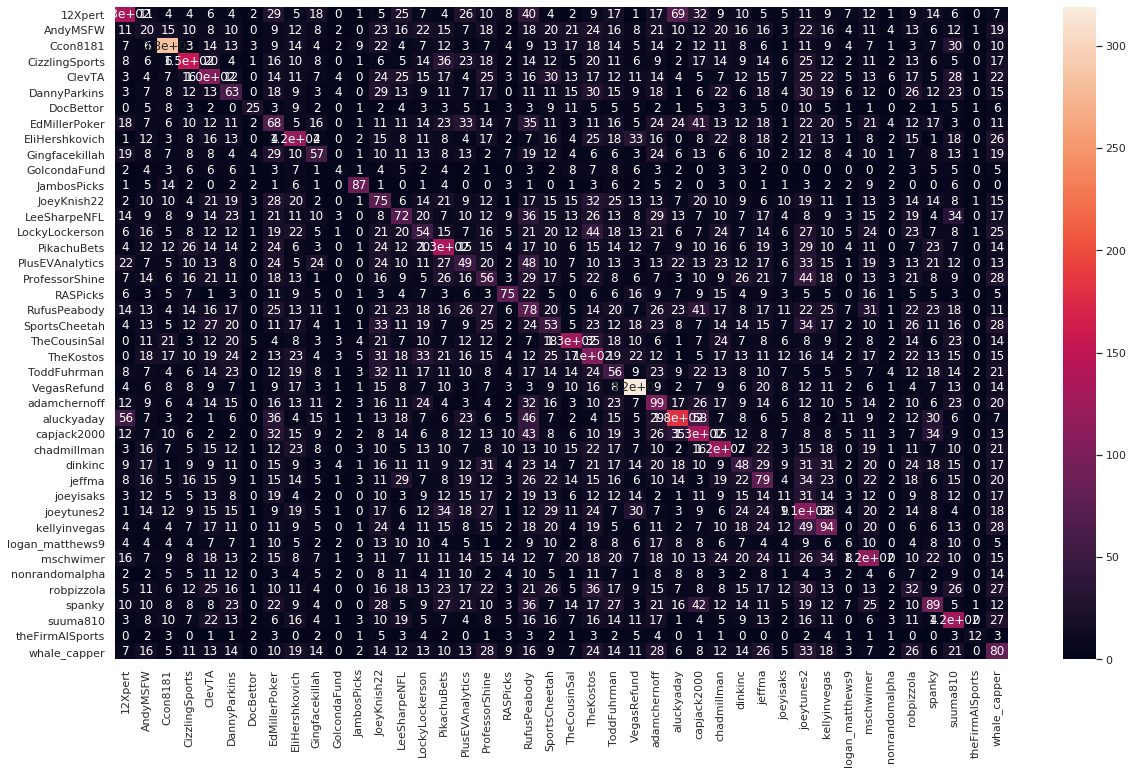

In [0]:
plt.figure(figsize=(20,12))
sns.heatmap(matrix_dnn, annot=True);

### Pretty Heatmap with Details

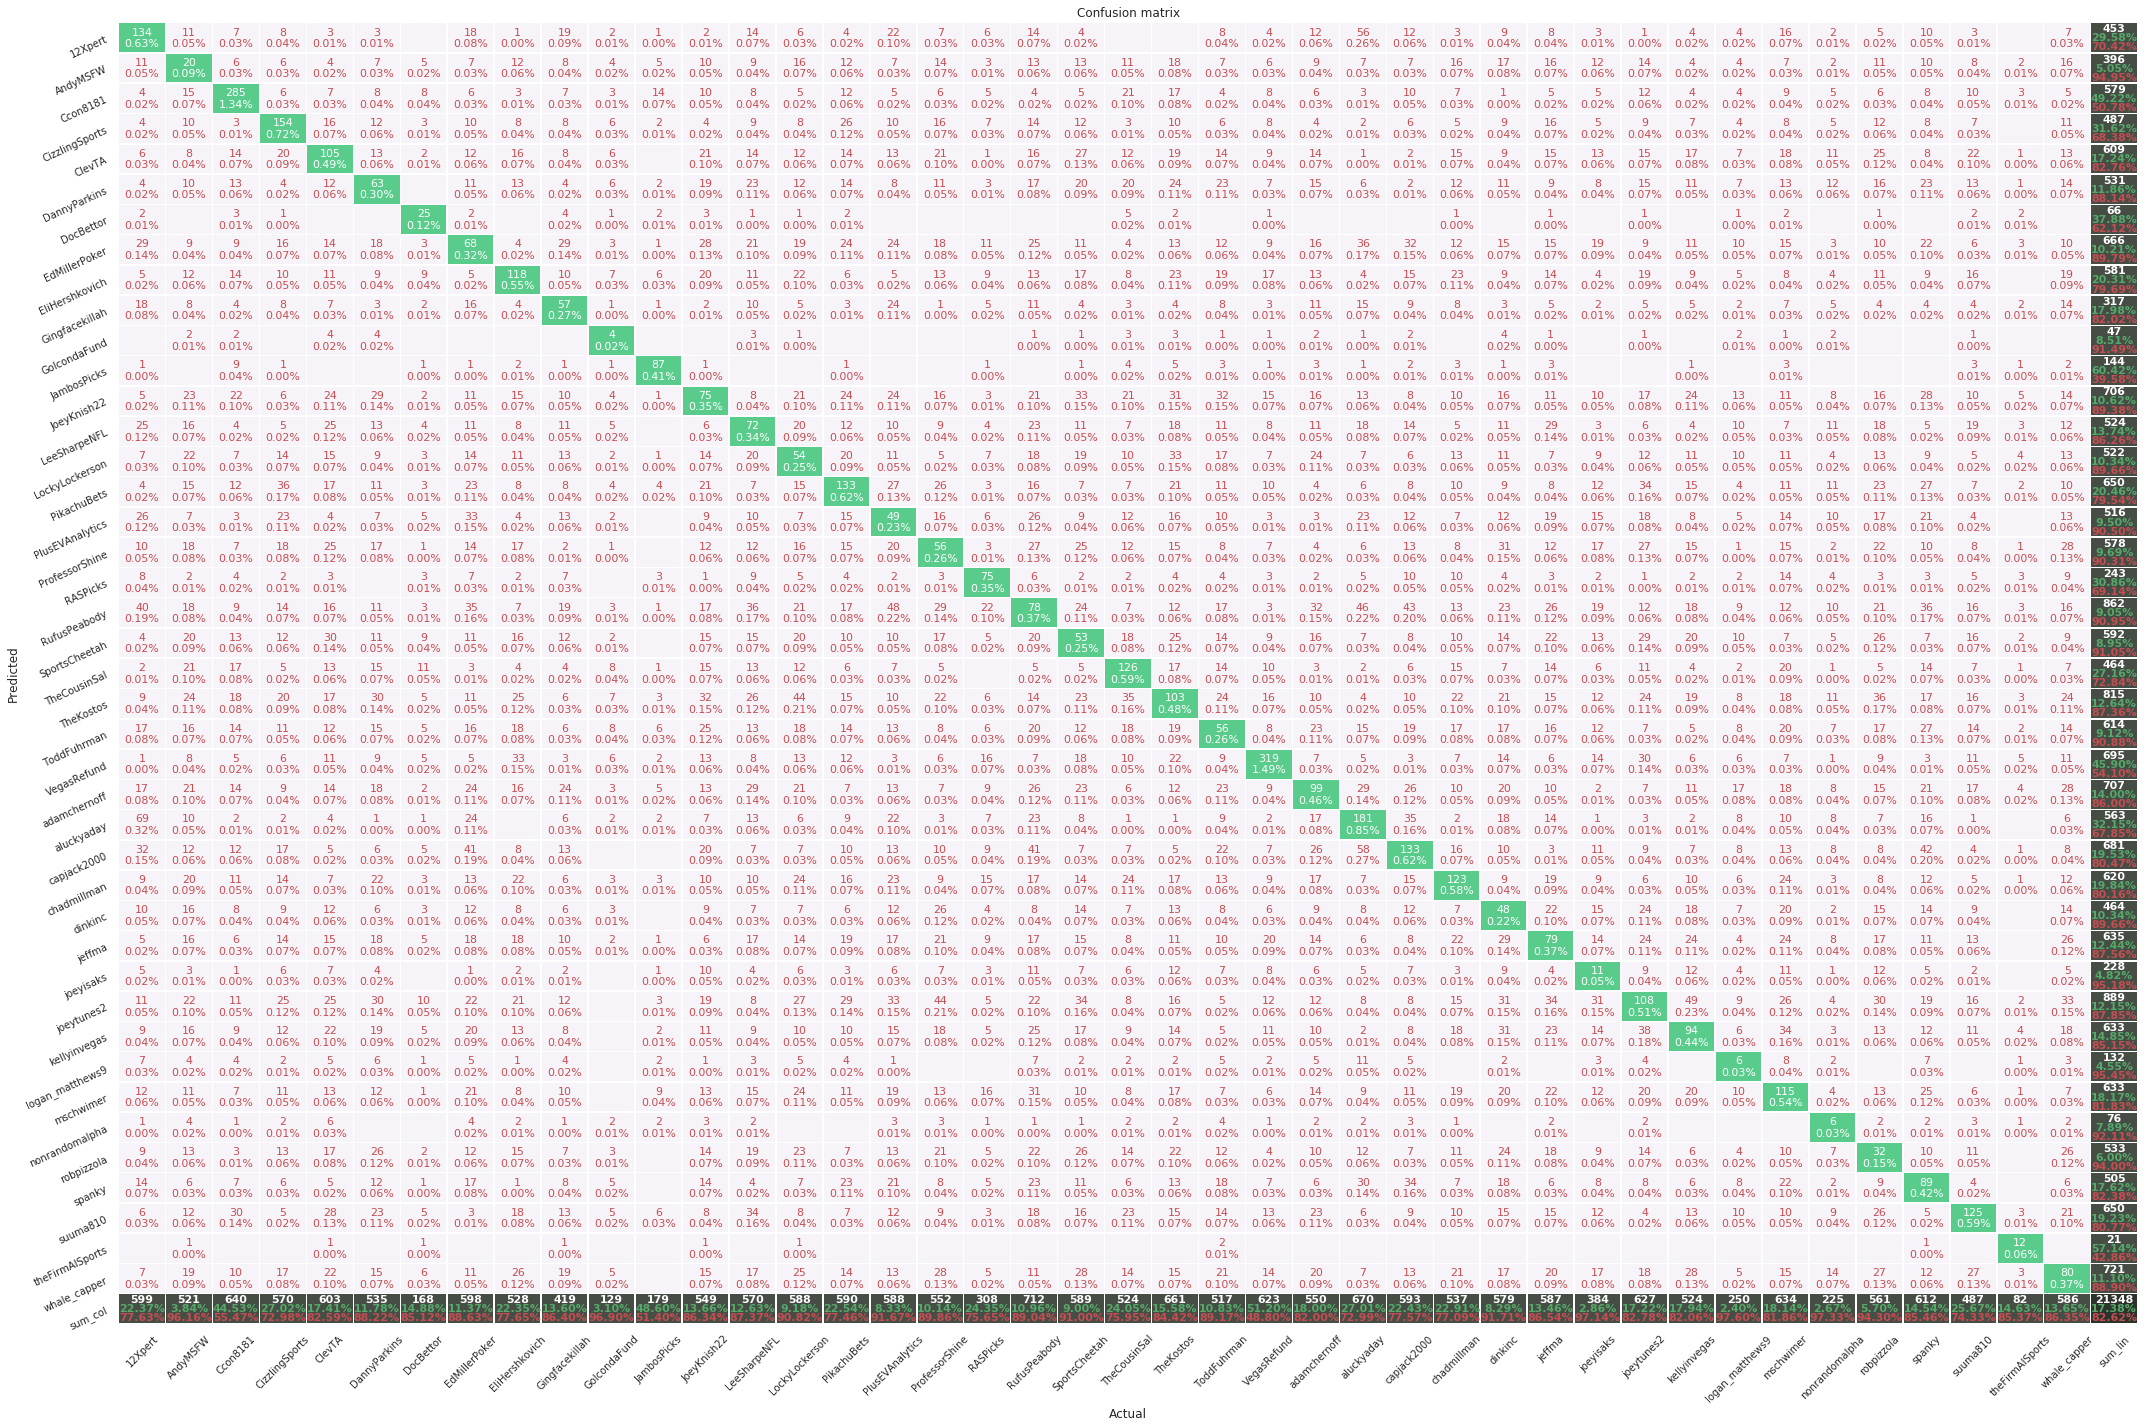

In [0]:
cmap = 'PuRd'
pretty_plot_confusion_matrix(matrix_dnn, cmap=cmap, figsize=[30, 20])

## Confusion Matrix: CNN

### Regular Heatmap

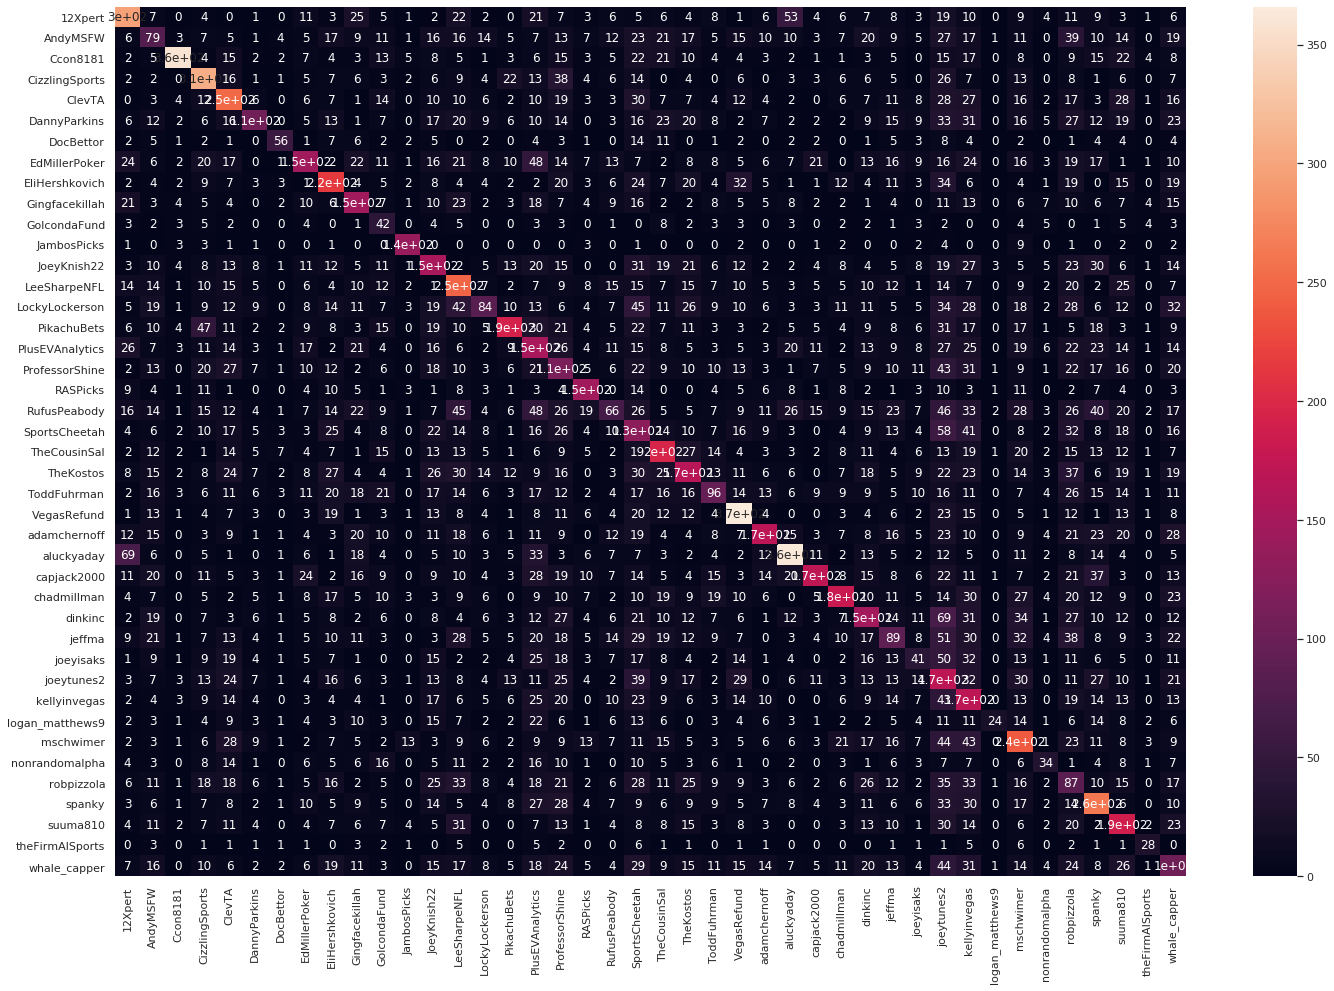

In [0]:
plt.figure(figsize=(24,16))
sns.heatmap(matrix_cnn, annot=True);

### Pretty Heatmap with Details

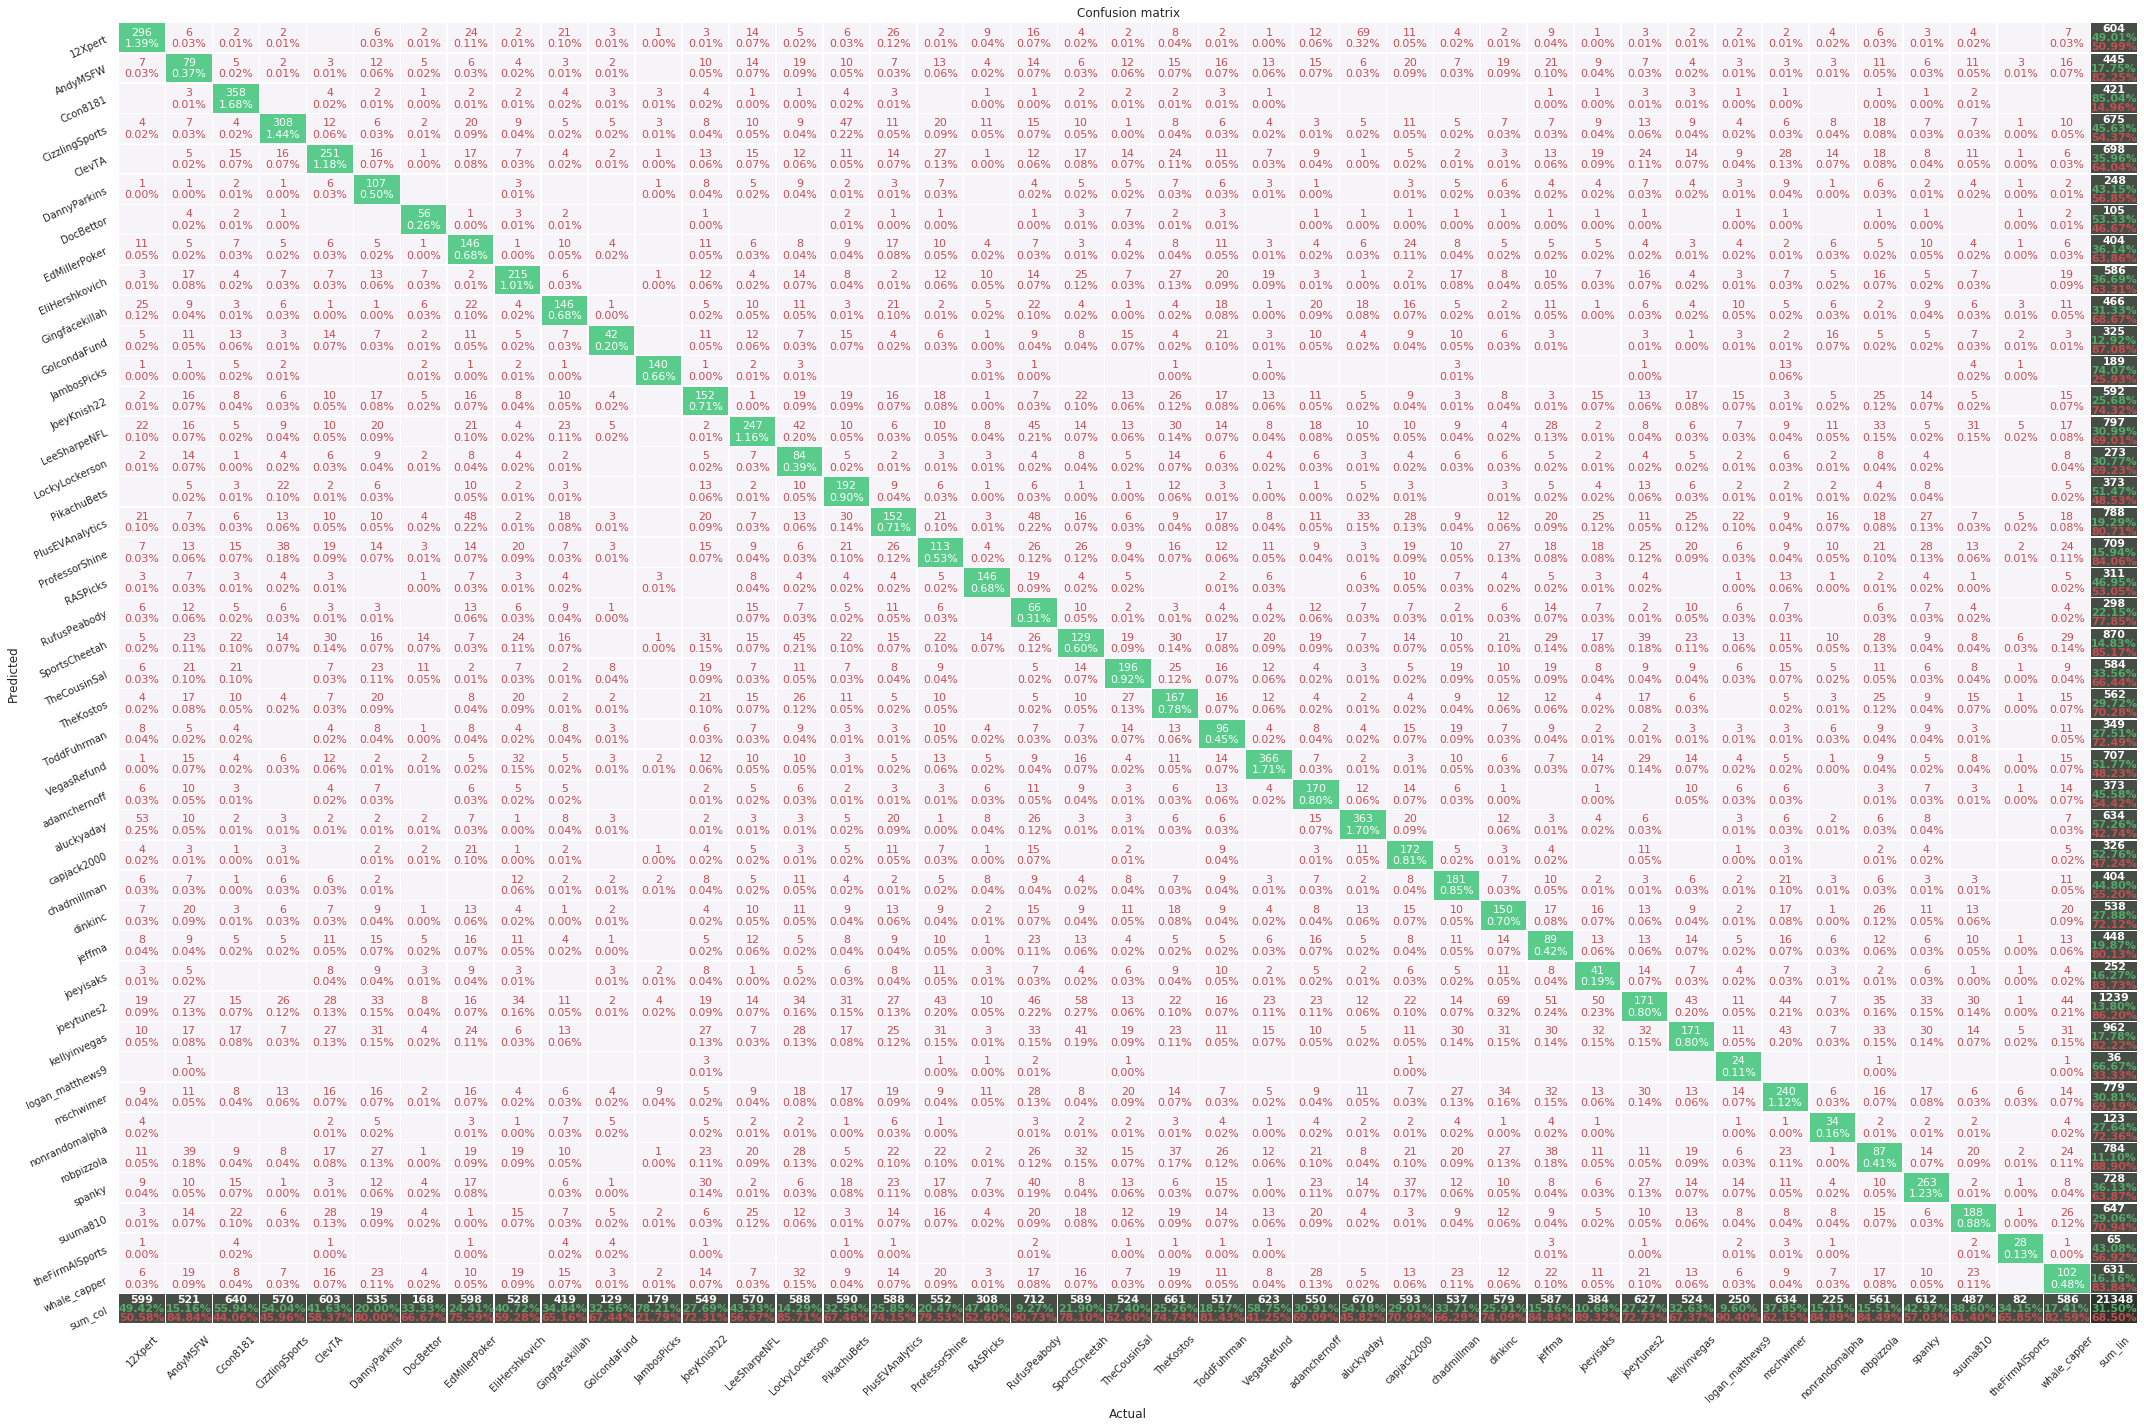

In [0]:
cmap = 'PuRd'
pretty_plot_confusion_matrix(matrix_cnn, cmap=cmap, figsize=[30, 20])

## Confusion Matrix: RNN

### Regular Heatmap

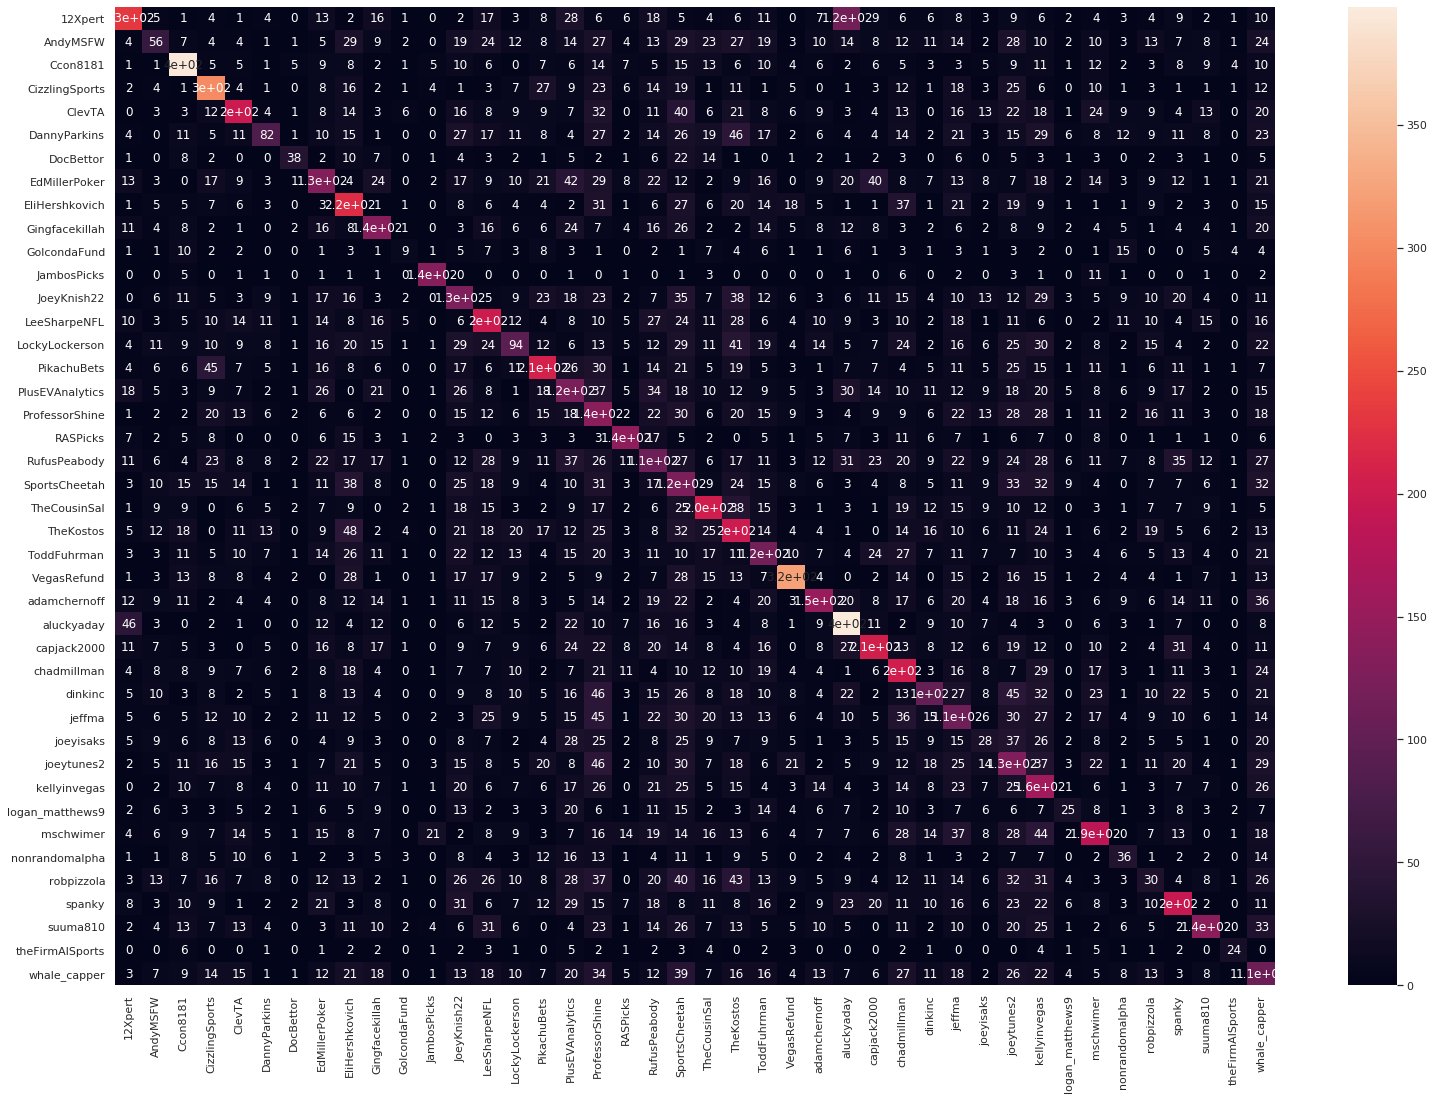

In [0]:
plt.figure(figsize=(26,18))
sns.heatmap(matrix_rnn, annot=True);

### Pretty Heatmap with Details

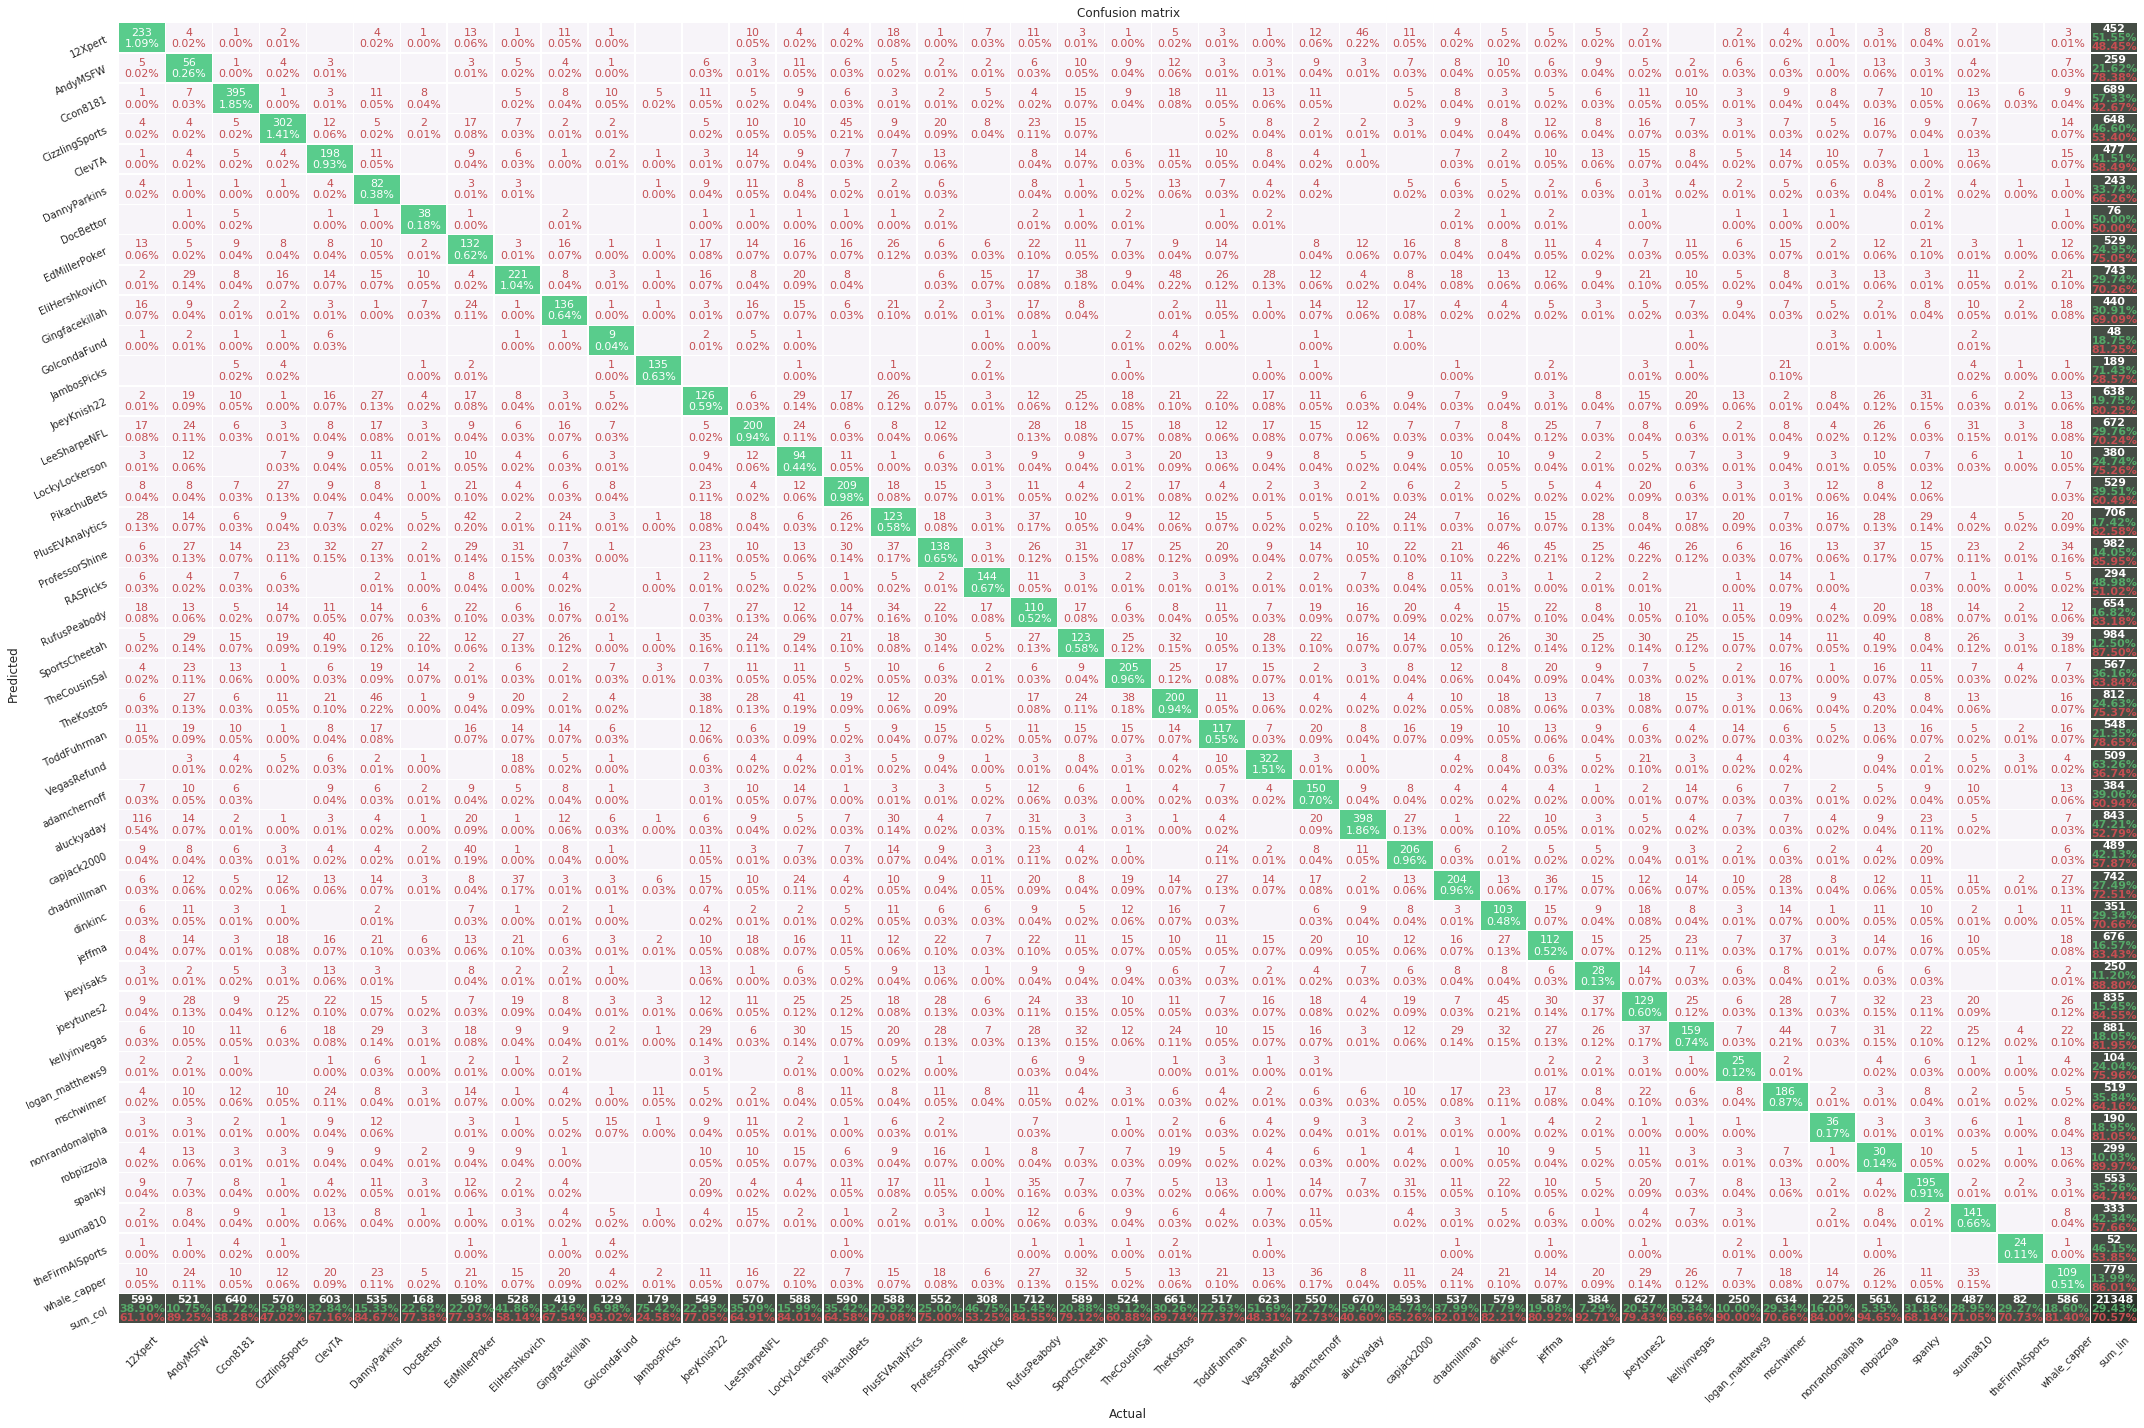

In [0]:
cmap = 'PuRd'
pretty_plot_confusion_matrix(matrix_rnn, cmap=cmap, figsize=[30, 20])

## Confusion Matrix: Bi-RNN

### Regular Heatmap

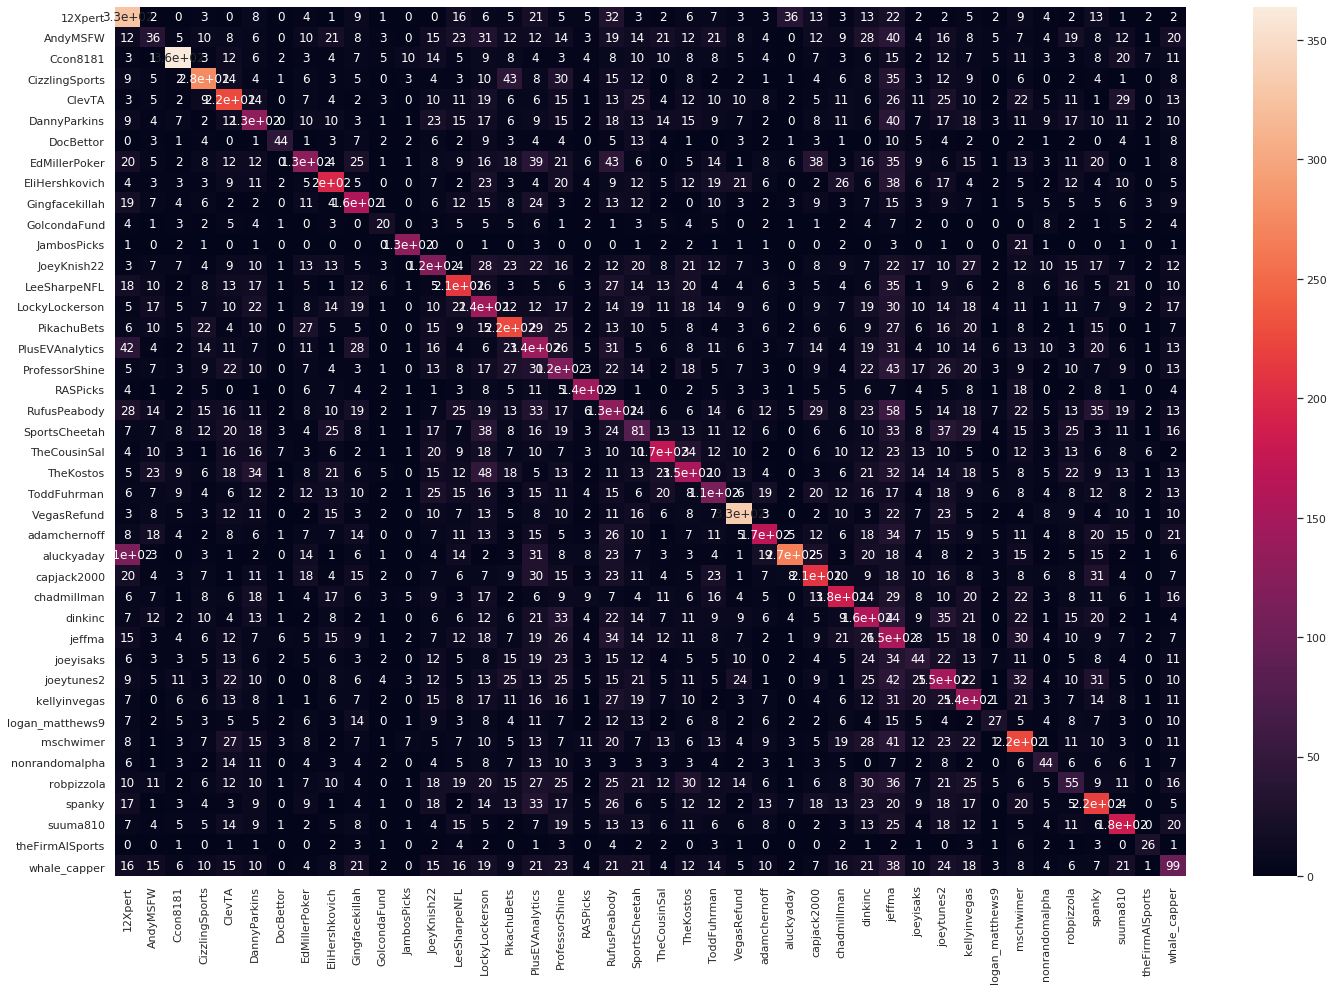

In [0]:
plt.figure(figsize=(24,16))
sns.heatmap(matrix_brnn, annot=True);

### Pretty Heatmap with Details

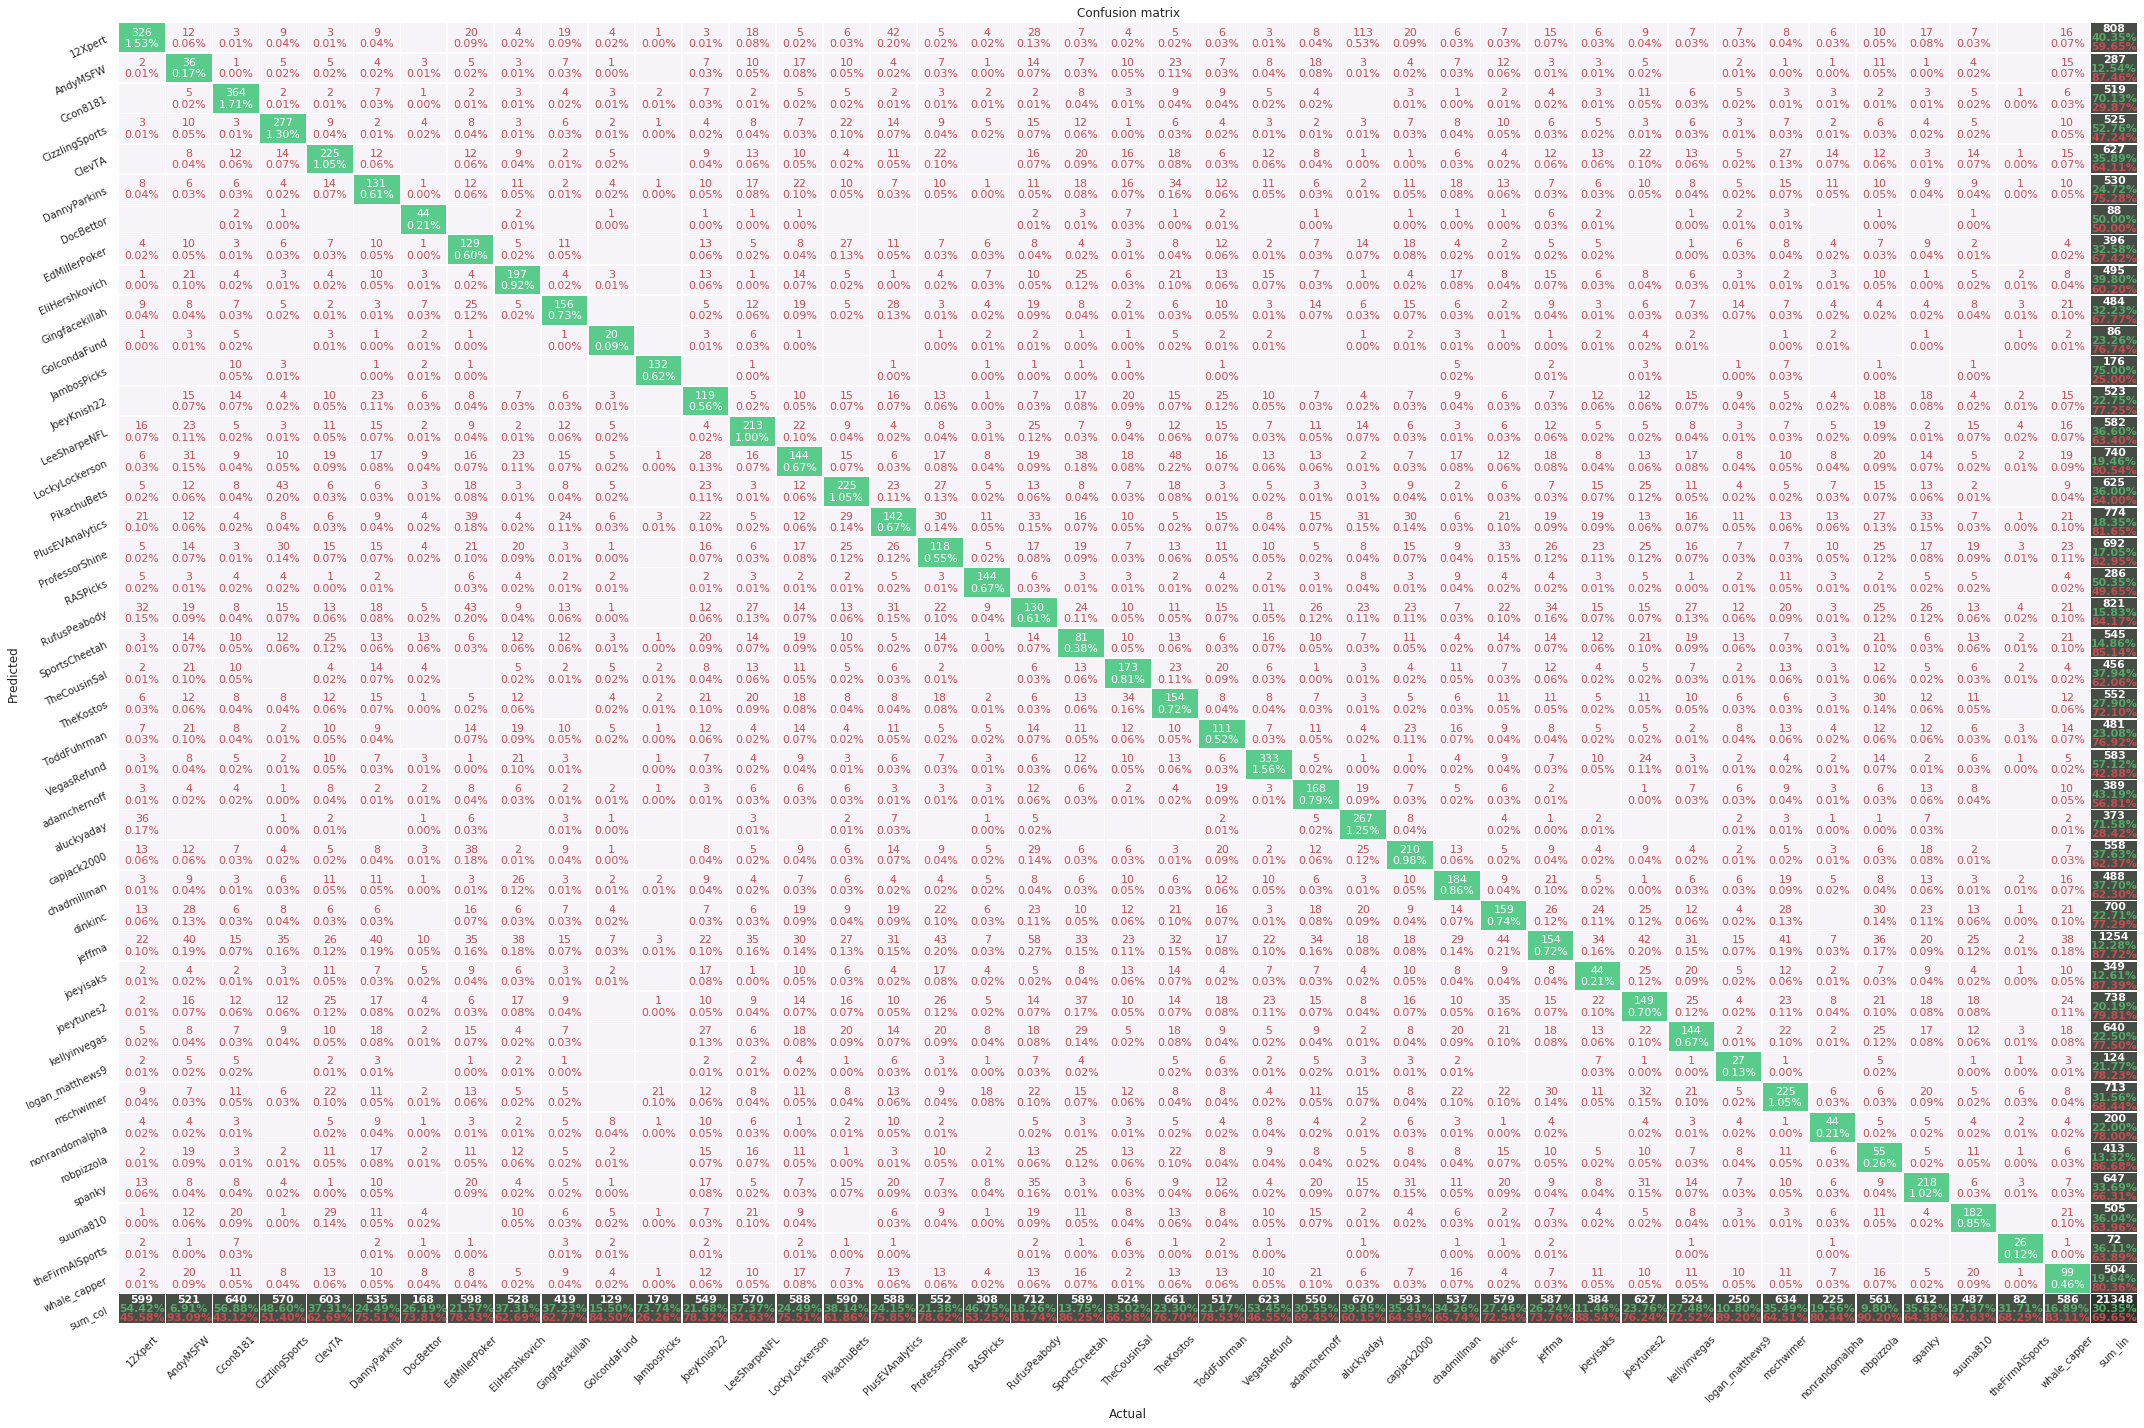

In [0]:
cmap = 'PuRd'
pretty_plot_confusion_matrix(matrix_brnn, cmap=cmap, figsize=[30, 20])